In [239]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

The only relevant data

In [241]:
regions=pd.read_csv(r"F:\Dota data\Dota Analysis\cluster_regions.csv")
heroes=pd.read_csv(r"F:\Dota data\Dota Analysis\hero_names.csv")
matches=pd.read_csv(r"F:\Dota data\Dota Analysis\match.csv")
patch=pd.read_csv(r"F:\Dota data\Dota Analysis\patch_dates.csv")
players=pd.read_csv(r"F:\Dota data\Dota Analysis\players.csv")
items=pd.read_csv(r"F:\Dota data\Dota Analysis\item_ids.csv")

The different items

In [294]:
items.head()

,item_id,item_name
0,1,blink
1,2,blades_of_attack
2,3,broadsword
3,4,chainmail
4,5,claymore


The different regions for different game servers

In [242]:
regions.head()

,cluster,region
0,111,US WEST
1,112,US WEST
2,113,US WEST
3,121,US EAST
4,122,US EAST


Use cluster column to join on other dataframes

In [243]:
regions.dtypes

cluster     int64
region     object
dtype: object

The different playable characters, i.e., Heroes 

In [244]:
heroes.head()

,name,hero_id,localized_name
0,npc_dota_hero_antimage,1,Anti-Mage
1,npc_dota_hero_axe,2,Axe
2,npc_dota_hero_bane,3,Bane
3,npc_dota_hero_bloodseeker,4,Bloodseeker
4,npc_dota_hero_crystal_maiden,5,Crystal Maiden


In [245]:
heroes.dtypes

name              object
hero_id            int64
localized_name    object
dtype: object

Matches for which data have been collected

In [246]:
matches.head()

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster
0,0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155
1,1,1446753078,2582,0,1846,63,0,221,22,False,0,2,154
2,2,1446764586,2716,256,1972,63,48,190,22,False,0,0,132
3,3,1446765723,3085,4,1924,51,3,40,22,False,0,0,191
4,4,1446796385,1887,2047,0,0,63,58,22,True,0,0,156


Only relevant fields are match_id,start_time,duration,game_mode,radiant_win,clusterm

In [247]:
matches.dtypes

match_id                int64
start_time              int64
duration                int64
tower_status_radiant    int64
tower_status_dire       int64
                        ...  
game_mode               int64
radiant_win              bool
negative_votes          int64
positive_votes          int64
cluster                 int64
Length: 13, dtype: object

In [248]:
matches=matches[["match_id","start_time","duration","game_mode","radiant_win","cluster"]]

In [249]:
matches.dtypes

match_id       int64
start_time     int64
duration       int64
game_mode      int64
radiant_win     bool
cluster        int64
dtype: object

Current Patch. There are sub-patches too but not given any info on those

In [250]:
patch.head()

,patch_date,name
0,2010-12-24T00:00:00Z,6.70
1,2011-01-21T00:00:00Z,6.71
2,2011-04-27T00:00:00Z,6.72
3,2011-12-24T00:00:00Z,6.73
4,2012-03-10T00:00:00Z,6.74


In [251]:
players.head()

,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,...,unit_order_glyph,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue
0,0,0,86,0,3261,10960,347,362,9,3,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,51,1,2954,17760,494,659,13,3,...,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,83,2,110,12195,350,385,0,4,...,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2,11,3,1179,22505,599,605,8,4,...,1.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,3,67,4,3307,23825,613,762,20,3,...,3.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN


In [252]:
pd.set_option('display.max_rows', None)
print(players.dtypes)
pd.set_option('display.max_rows', 10)
print(players.columns)

match_id                               int64
account_id                             int64
hero_id                                int64
player_slot                            int64
gold                                   int64
gold_spent                             int64
gold_per_min                           int64
xp_per_min                             int64
kills                                  int64
deaths                                 int64
assists                                int64
denies                                 int64
last_hits                              int64
stuns                                 object
hero_damage                            int64
hero_healing                           int64
tower_damage                           int64
item_0                                 int64
item_1                                 int64
item_2                                 int64
item_3                                 int64
item_4                                 int64
item_5    

Relevant columns ['match_id', 'account_id', 'hero_id', 'player_slot', 'gold_per_min', 'xp_per_min', 'kills', 'deaths',
       'tower_damage']

In [253]:
players=players[['match_id', 'account_id', 'hero_id', 'player_slot', 'gold_per_min', 'xp_per_min', 'kills', 'deaths', 'tower_damage', 'item_0', 'item_1' ,'item_2','item_3','item_4','item_5']]
players.head()

,match_id,account_id,hero_id,player_slot,gold_per_min,xp_per_min,kills,deaths,tower_damage,item_0,item_1,item_2,item_3,item_4,item_5
0,0,0,86,0,347,362,9,3,143,180,37,73,56,108,0
1,0,1,51,1,494,659,13,3,423,46,63,119,102,24,108
2,0,0,83,2,350,385,0,4,399,48,60,59,108,65,0
3,0,2,11,3,599,605,8,4,6055,63,147,154,164,79,160
4,0,3,67,4,613,762,20,3,1833,114,92,147,0,137,63


In [254]:
players.dtypes

match_id        int64
account_id      int64
hero_id         int64
player_slot     int64
gold_per_min    int64
                ...  
item_1          int64
item_2          int64
item_3          int64
item_4          int64
item_5          int64
Length: 15, dtype: object

All int but hero_id is categorical. Now check for na values

In [255]:
print(f"Missing Values in regions:{regions.isnull().values.any()}")
print(f"Missing Values in heroes:{heroes.isnull().values.any()}")
print(f"Missing Values in regions:{matches.isnull().values.any()}")
print(f"Missing Values in regions:{patch.isnull().values.any()}")
print(f"Missing Values in regions:{players.isnull().values.any()}")

Missing Values in regions:False
Missing Values in heroes:False
Missing Values in regions:False
Missing Values in regions:False
Missing Values in regions:False


Questions to Ask:-
1. Which region plays most dota?
2. Which hero is most played?
3. Which hero accumulates the most gold?
4. which hero accumulates the most exp?
5. Which hero kills most?
6. Which hero dies most?
7. What hero was good at each patch?(Time series)
8. What hero was worst at each patch?(Tim Series)
9. Which big item is usually most bought per patch?
10. Which big item is usually least bought per patch?
11. What is the distribution of GPM per hero?
12. What is the distribution of XPM per hero?

## Which region plays most dota?

In [256]:
df=pd.merge(matches,regions,left_on="cluster",right_on="cluster",how="left")
df.head()

,match_id,start_time,duration,game_mode,radiant_win,cluster,region
0,0,1446750112,2375,22,True,155,SINGAPORE
1,1,1446753078,2582,22,False,154,SINGAPORE
2,2,1446764586,2716,22,False,132,EUROPE
3,3,1446765723,3085,22,False,191,AUSTRIA
4,4,1446796385,1887,22,True,156,SINGAPORE


In [257]:
df.replace({"EUROPE":"EU","SINGAPORE":"SNG","AUSTRALIA":"AUS","AUSTRIA":"AST","BRAZIL":"BRZ","STOCKHOLM":"STK",
            'PW TELECOM SHANGHAI':"SHNG",'PW TELECOM ZHEJIANG':"ZHE",'PW TELECOM GUANGDONG':"GNG","PW UNICOM":"UNI"},inplace=True)
df["region"].value_counts().index

Index(['EU', 'US EAST', 'SNG', 'US WEST', 'AUS', 'AST', 'BRZ', 'STK', 'SHNG',
       'ZHE', 'GNG', 'JAPAN', 'UNI', 'DUBAI', 'CHILE'],
      dtype='object')

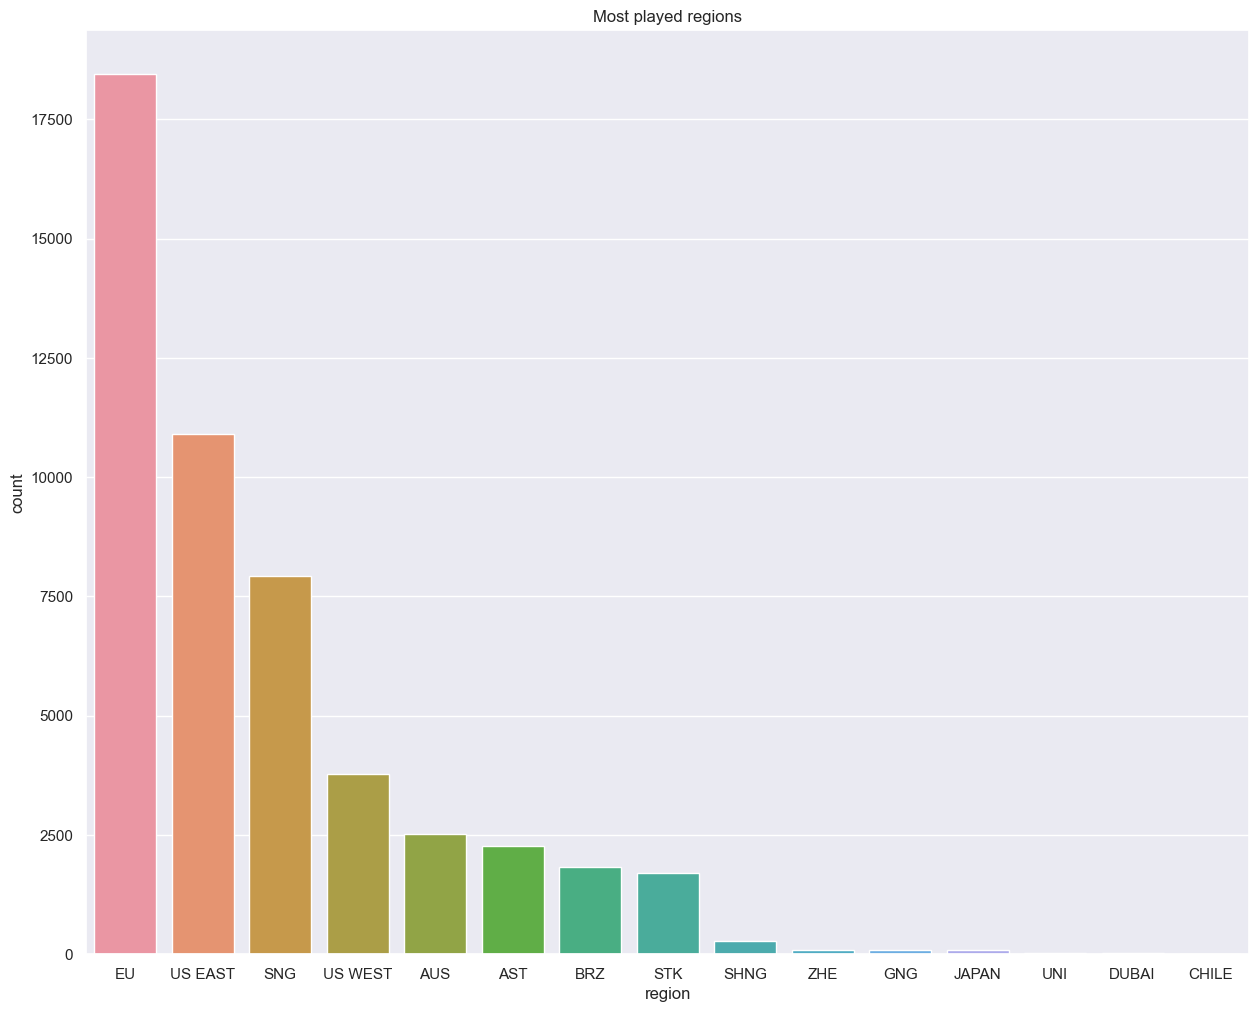

In [258]:
sns.countplot(df,x="region",order=df["region"].value_counts().index).set(title='Most played regions')
sns.set_theme(rc={'figure.figsize':(15,12)})

## Which hero is most played?

In [259]:
df=pd.merge(players, heroes[["hero_id","localized_name"]],left_on="hero_id",right_on="hero_id",how="left")
df

,match_id,account_id,hero_id,player_slot,gold_per_min,xp_per_min,kills,deaths,tower_damage,item_0,item_1,item_2,item_3,item_4,item_5,localized_name
0,0,0,86,0,347,362,9,3,143,180,37,73,56,108,0,Rubick
1,0,1,51,1,494,659,13,3,423,46,63,119,102,24,108,Clockwerk
2,0,0,83,2,350,385,0,4,399,48,60,59,108,65,0,Treant Protector
3,0,2,11,3,599,605,8,4,6055,63,147,154,164,79,160,Shadow Fiend
4,0,3,67,4,613,762,20,3,1833,114,92,147,0,137,63,Spectre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,49999,0,100,128,468,626,16,9,1227,249,41,0,50,141,168,Tusk
499996,49999,0,9,129,507,607,12,6,2269,135,63,166,30,36,139,Mirana
499997,49999,0,90,130,371,404,5,3,87,79,48,152,108,102,117,Keeper of the Light
499998,49999,0,73,131,780,703,8,6,2851,249,154,112,48,114,137,Alchemist


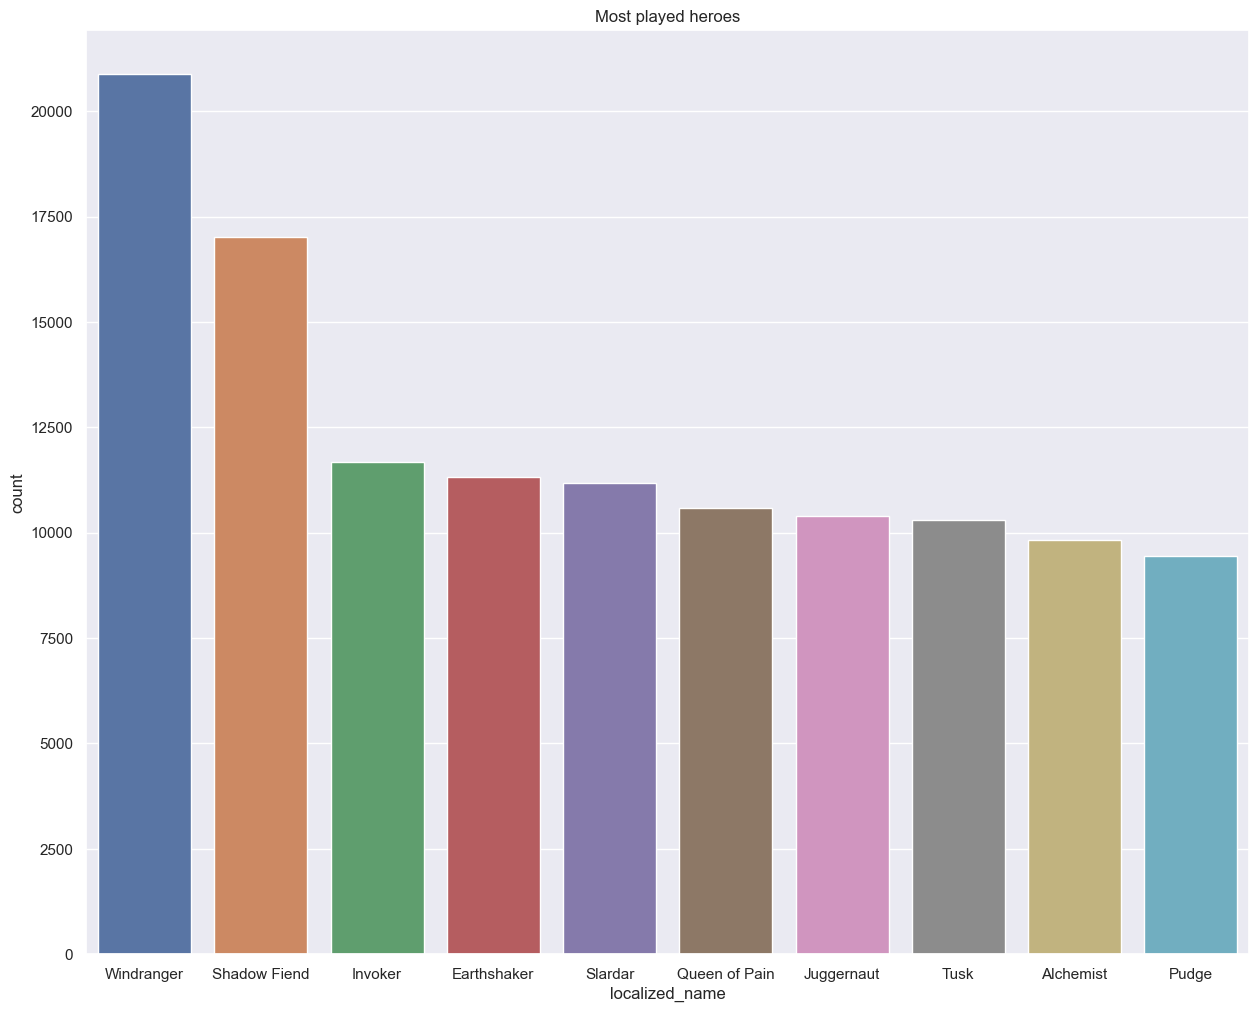

In [260]:
sns.countplot(df,x="localized_name",order=df["localized_name"].value_counts().index[:10]).set(title="Most played heroes")
sns.set_theme(rc={'figure.figsize':(15,12)})

## Which hero accumulates the most gold?

In [261]:
df=pd.merge(players,heroes[["hero_id","localized_name"]],left_on="hero_id",right_on="hero_id",how="left")
df.head()

,match_id,account_id,hero_id,player_slot,gold_per_min,xp_per_min,kills,deaths,tower_damage,item_0,item_1,item_2,item_3,item_4,item_5,localized_name
0,0,0,86,0,347,362,9,3,143,180,37,73,56,108,0,Rubick
1,0,1,51,1,494,659,13,3,423,46,63,119,102,24,108,Clockwerk
2,0,0,83,2,350,385,0,4,399,48,60,59,108,65,0,Treant Protector
3,0,2,11,3,599,605,8,4,6055,63,147,154,164,79,160,Shadow Fiend
4,0,3,67,4,613,762,20,3,1833,114,92,147,0,137,63,Spectre


In [262]:
top_gold=df.groupby("localized_name")["gold_per_min"].mean().sort_values(ascending=False)

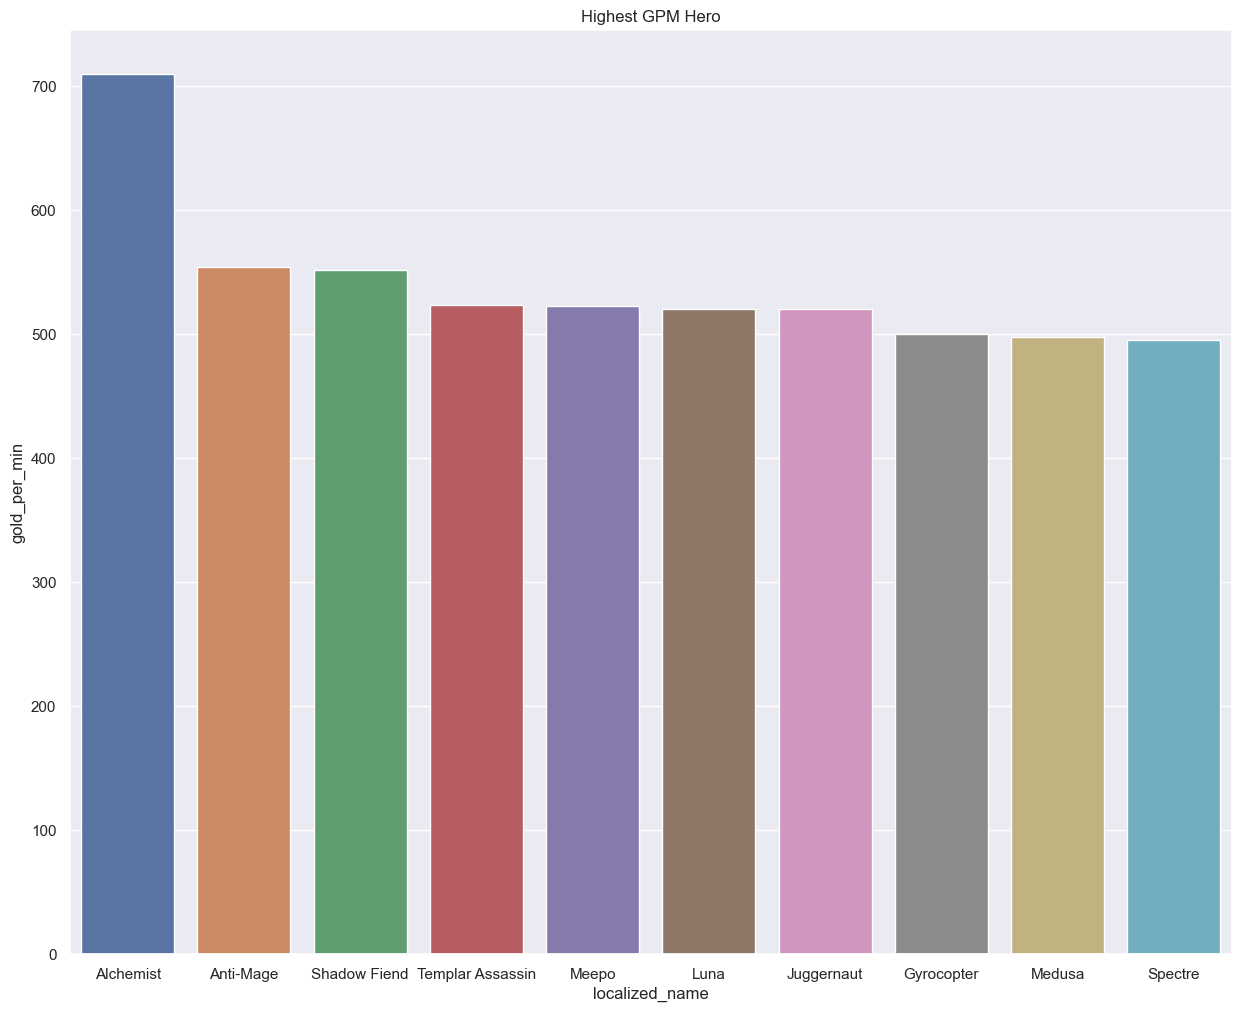

In [263]:
sns.barplot(x=top_gold.index[:10],y=top_gold[:10]).set(title="Highest GPM Hero")
sns.set_theme(rc={'figure.figsize':(15,12)})

## Which hero accumulates most exp?

In [264]:
df=pd.merge(players,heroes[["hero_id","localized_name"]],left_on="hero_id",right_on="hero_id",how="left")
df.head()

,match_id,account_id,hero_id,player_slot,gold_per_min,xp_per_min,kills,deaths,tower_damage,item_0,item_1,item_2,item_3,item_4,item_5,localized_name
0,0,0,86,0,347,362,9,3,143,180,37,73,56,108,0,Rubick
1,0,1,51,1,494,659,13,3,423,46,63,119,102,24,108,Clockwerk
2,0,0,83,2,350,385,0,4,399,48,60,59,108,65,0,Treant Protector
3,0,2,11,3,599,605,8,4,6055,63,147,154,164,79,160,Shadow Fiend
4,0,3,67,4,613,762,20,3,1833,114,92,147,0,137,63,Spectre


In [265]:
top_exp=df.groupby("localized_name")["xp_per_min"].mean().sort_values(ascending=False)

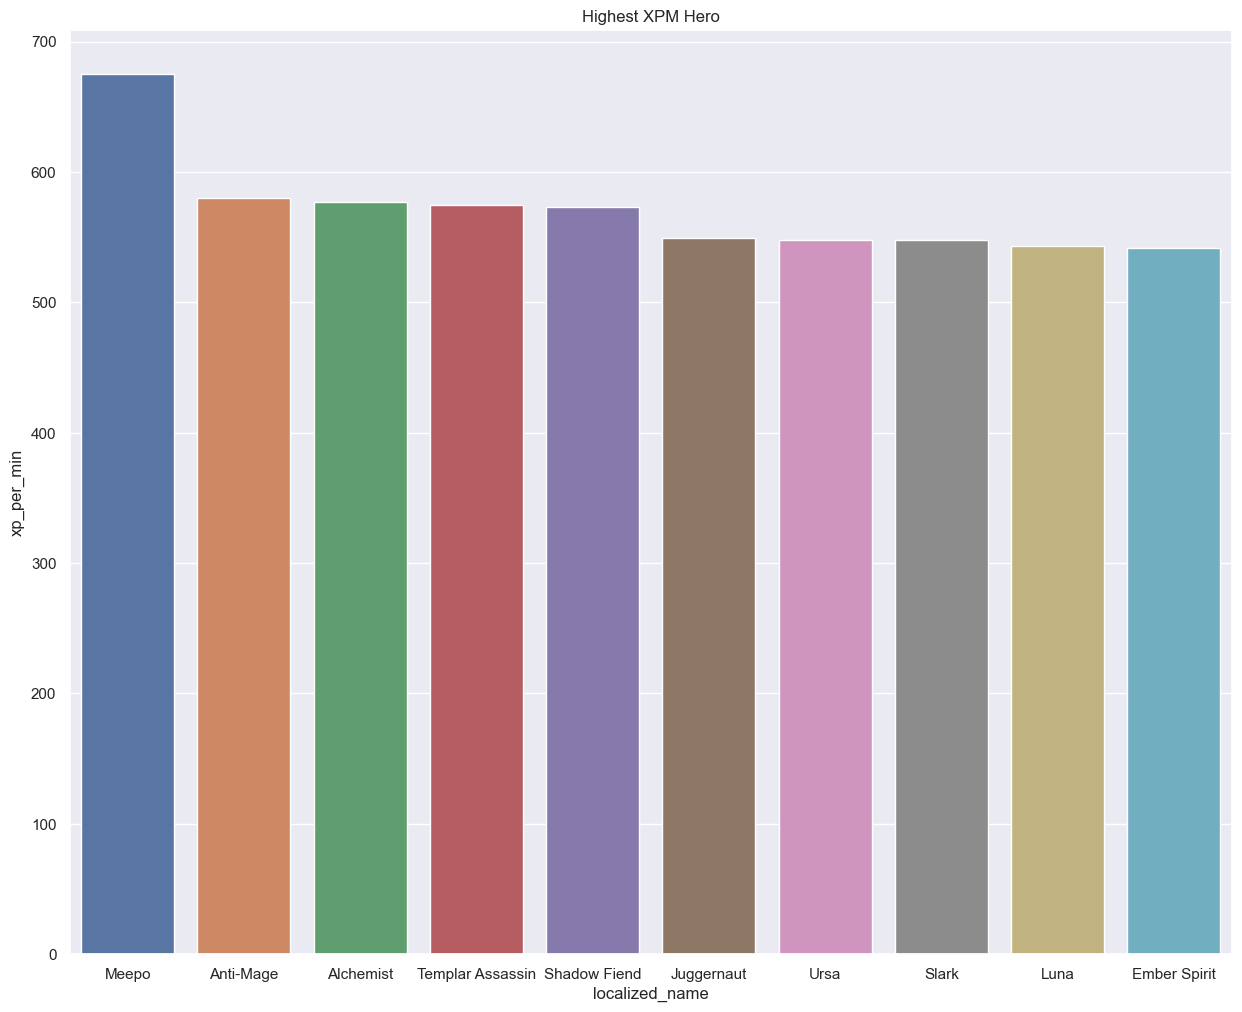

In [266]:
sns.barplot(x=top_exp.index[:10],y=top_exp[:10]).set(title="Highest XPM Hero")
sns.set_theme(rc={'figure.figsize':(15,12)})

## Which hero kills most?

In [267]:
df=pd.merge(players,heroes[["hero_id","localized_name"]],left_on="hero_id",right_on="hero_id",how="left")
df.head()

,match_id,account_id,hero_id,player_slot,gold_per_min,xp_per_min,kills,deaths,tower_damage,item_0,item_1,item_2,item_3,item_4,item_5,localized_name
0,0,0,86,0,347,362,9,3,143,180,37,73,56,108,0,Rubick
1,0,1,51,1,494,659,13,3,423,46,63,119,102,24,108,Clockwerk
2,0,0,83,2,350,385,0,4,399,48,60,59,108,65,0,Treant Protector
3,0,2,11,3,599,605,8,4,6055,63,147,154,164,79,160,Shadow Fiend
4,0,3,67,4,613,762,20,3,1833,114,92,147,0,137,63,Spectre


In [268]:
top_kills=df.groupby("localized_name")["kills"].mean().sort_values(ascending=False)

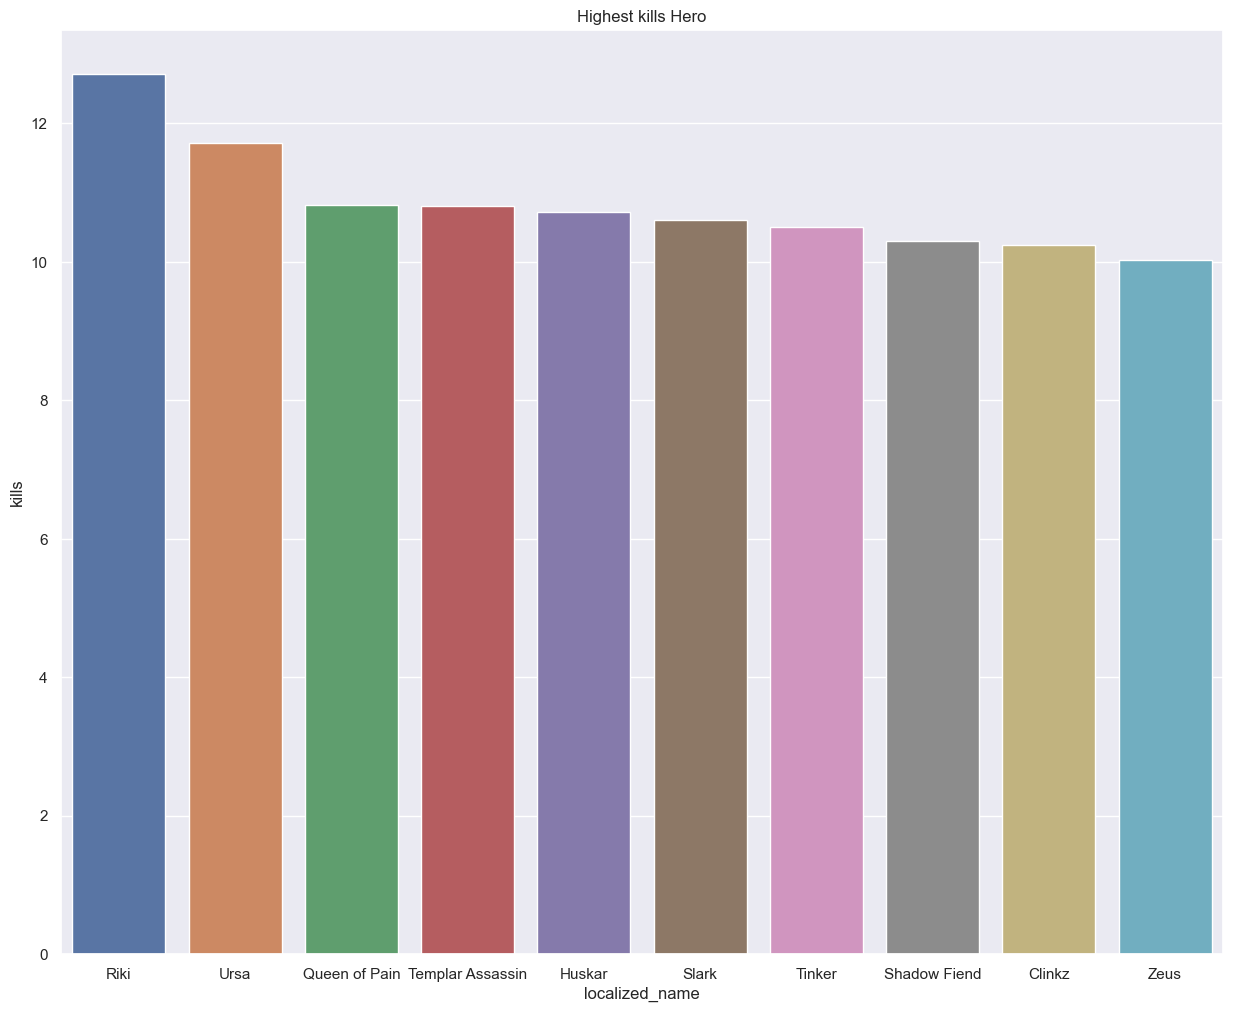

In [269]:
sns.barplot(x=top_kills.index[:10],y=top_kills[:10]).set(title="Highest kills Hero")
sns.set_theme(rc={'figure.figsize':(15,12)})

## Which hero dies most?

In [270]:
df=pd.merge(players,heroes[["hero_id","localized_name"]],left_on="hero_id",right_on="hero_id",how="left")
df.head()

,match_id,account_id,hero_id,player_slot,gold_per_min,xp_per_min,kills,deaths,tower_damage,item_0,item_1,item_2,item_3,item_4,item_5,localized_name
0,0,0,86,0,347,362,9,3,143,180,37,73,56,108,0,Rubick
1,0,1,51,1,494,659,13,3,423,46,63,119,102,24,108,Clockwerk
2,0,0,83,2,350,385,0,4,399,48,60,59,108,65,0,Treant Protector
3,0,2,11,3,599,605,8,4,6055,63,147,154,164,79,160,Shadow Fiend
4,0,3,67,4,613,762,20,3,1833,114,92,147,0,137,63,Spectre


In [271]:
top_deaths=df.groupby("localized_name")["deaths"].mean().sort_values(ascending=False)

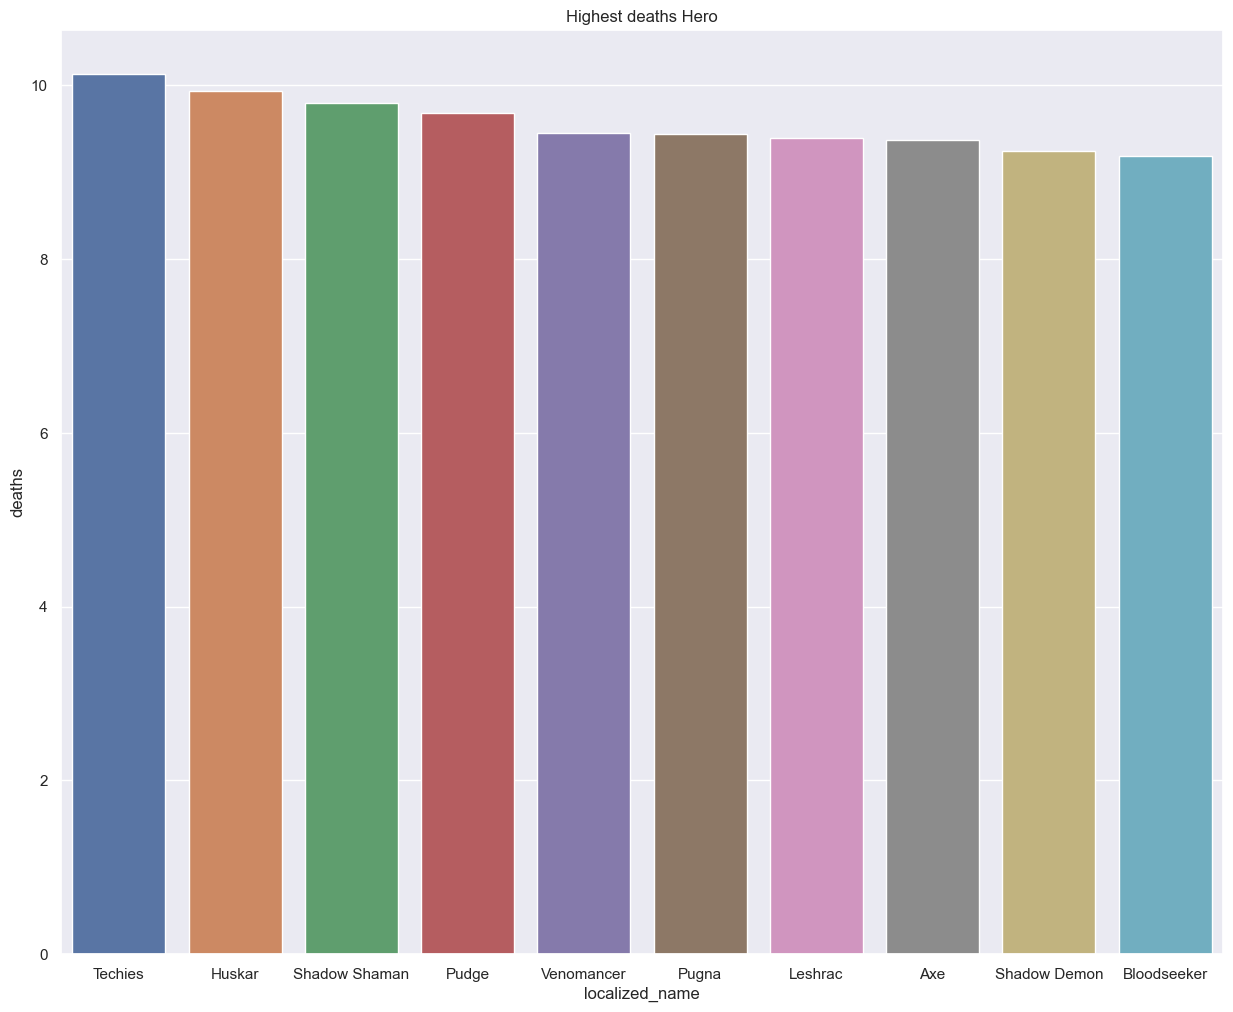

In [272]:
sns.barplot(x=top_deaths.index[:10],y=top_deaths[:10]).set(title="Highest deaths Hero")
sns.set_theme(rc={'figure.figsize':(15,12)})

## What hero was good at each patch?(Time series)

In [273]:
df=pd.merge(players,matches,left_on="match_id",right_on="match_id",how="right")
df.head()

,match_id,account_id,hero_id,player_slot,gold_per_min,xp_per_min,kills,deaths,tower_damage,item_0,item_1,item_2,item_3,item_4,item_5,start_time,duration,game_mode,radiant_win,cluster
0,0,0,86,0,347,362,9,3,143,180,37,73,56,108,0,1446750112,2375,22,True,155
1,0,1,51,1,494,659,13,3,423,46,63,119,102,24,108,1446750112,2375,22,True,155
2,0,0,83,2,350,385,0,4,399,48,60,59,108,65,0,1446750112,2375,22,True,155
3,0,2,11,3,599,605,8,4,6055,63,147,154,164,79,160,1446750112,2375,22,True,155
4,0,3,67,4,613,762,20,3,1833,114,92,147,0,137,63,1446750112,2375,22,True,155


In [274]:
df["start_time_date_time"]=pd.to_datetime(df['start_time'],unit='s',utc=True).dt.tz_convert(None)
df["start_time_date_time"].sort_values()
df.head()

,match_id,account_id,hero_id,player_slot,gold_per_min,xp_per_min,kills,deaths,tower_damage,item_0,...,item_2,item_3,item_4,item_5,start_time,duration,game_mode,radiant_win,cluster,start_time_date_time
0,0,0,86,0,347,362,9,3,143,180,...,73,56,108,0,1446750112,2375,22,True,155,2015-11-05 19:01:52
1,0,1,51,1,494,659,13,3,423,46,...,119,102,24,108,1446750112,2375,22,True,155,2015-11-05 19:01:52
2,0,0,83,2,350,385,0,4,399,48,...,59,108,65,0,1446750112,2375,22,True,155,2015-11-05 19:01:52
3,0,2,11,3,599,605,8,4,6055,63,...,154,164,79,160,1446750112,2375,22,True,155,2015-11-05 19:01:52
4,0,3,67,4,613,762,20,3,1833,114,...,147,0,137,63,1446750112,2375,22,True,155,2015-11-05 19:01:52


In [275]:
patch['next_date']=patch['patch_date'].shift(-1)
patch.at[18,"next_date"]=patch.loc[18]["patch_date"]
patch.rename(columns={"name":"patch_name"},inplace=True)
patch

,patch_date,patch_name,next_date
0,2010-12-24T00:00:00Z,6.70,2011-01-21T00:00:00Z
1,2011-01-21T00:00:00Z,6.71,2011-04-27T00:00:00Z
2,2011-04-27T00:00:00Z,6.72,2011-12-24T00:00:00Z
3,2011-12-24T00:00:00Z,6.73,2012-03-10T00:00:00Z
4,2012-03-10T00:00:00Z,6.74,2012-09-30T00:00:00Z
...,...,...,...
14,2015-04-30T21:00:00Z,6.84,2015-09-24T20:00:00Z
15,2015-09-24T20:00:00Z,6.85,2015-12-16T20:00:00Z
16,2015-12-16T20:00:00Z,6.86,2016-04-26T01:00:00Z
17,2016-04-26T01:00:00Z,6.87,2016-06-12T08:00:00Z


In [276]:
patch["patch_date"] = pd.to_datetime(patch["patch_date"],utc=True).dt.tz_localize(None)
patch["next_date"] = pd.to_datetime(patch["next_date"],utc=True).dt.tz_localize(None)
patch.at[18,"next_date"]=patch.loc[18]["patch_date"]+datetime.timedelta(seconds=10)
patch["next_date"]=patch["next_date"].apply(lambda x: x-datetime.timedelta(seconds=1))
patch.dtypes

patch_date    datetime64[ns]
patch_name           float64
next_date     datetime64[ns]
dtype: object

In [277]:
patch

,patch_date,patch_name,next_date
0,2010-12-24 00:00:00,6.70,2011-01-20 23:59:59
1,2011-01-21 00:00:00,6.71,2011-04-26 23:59:59
2,2011-04-27 00:00:00,6.72,2011-12-23 23:59:59
3,2011-12-24 00:00:00,6.73,2012-03-09 23:59:59
4,2012-03-10 00:00:00,6.74,2012-09-29 23:59:59
...,...,...,...
14,2015-04-30 21:00:00,6.84,2015-09-24 19:59:59
15,2015-09-24 20:00:00,6.85,2015-12-16 19:59:59
16,2015-12-16 20:00:00,6.86,2016-04-26 00:59:59
17,2016-04-26 01:00:00,6.87,2016-06-12 07:59:59


In [278]:
idx = pd.IntervalIndex.from_arrays(patch['patch_date'], patch['next_date'], closed='both')
patch_name = patch.loc[idx.get_indexer(df.start_time_date_time), 'patch_name']
patch_name

15    6.85
15    6.85
15    6.85
15    6.85
15    6.85
      ... 
15    6.85
15    6.85
15    6.85
15    6.85
15    6.85
Name: patch_name, Length: 500000, dtype: float64

In [279]:
df['patch_name'] = patch_name.to_numpy()
df

,match_id,account_id,hero_id,player_slot,gold_per_min,xp_per_min,kills,deaths,tower_damage,item_0,...,item_3,item_4,item_5,start_time,duration,game_mode,radiant_win,cluster,start_time_date_time,patch_name
0,0,0,86,0,347,362,9,3,143,180,...,56,108,0,1446750112,2375,22,True,155,2015-11-05 19:01:52,6.85
1,0,1,51,1,494,659,13,3,423,46,...,102,24,108,1446750112,2375,22,True,155,2015-11-05 19:01:52,6.85
2,0,0,83,2,350,385,0,4,399,48,...,108,65,0,1446750112,2375,22,True,155,2015-11-05 19:01:52,6.85
3,0,2,11,3,599,605,8,4,6055,63,...,164,79,160,1446750112,2375,22,True,155,2015-11-05 19:01:52,6.85
4,0,3,67,4,613,762,20,3,1833,114,...,0,137,63,1446750112,2375,22,True,155,2015-11-05 19:01:52,6.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,49999,0,100,128,468,626,16,9,1227,249,...,50,141,168,1447829215,2788,22,False,154,2015-11-18 06:46:55,6.85
499996,49999,0,9,129,507,607,12,6,2269,135,...,30,36,139,1447829215,2788,22,False,154,2015-11-18 06:46:55,6.85
499997,49999,0,90,130,371,404,5,3,87,79,...,108,102,117,1447829215,2788,22,False,154,2015-11-18 06:46:55,6.85
499998,49999,0,73,131,780,703,8,6,2851,249,...,48,114,137,1447829215,2788,22,False,154,2015-11-18 06:46:55,6.85


In [280]:
patch_name.unique()

array([6.85])

Only 1 patch of data. "df" contains data for each player in all 50k matches. Just need to sum wins per hero divide by sum all per hero

In [281]:
df=pd.merge(df,heroes,left_on="hero_id",right_on="hero_id",how="left")
df

,match_id,account_id,hero_id,player_slot,gold_per_min,xp_per_min,kills,deaths,tower_damage,item_0,...,item_5,start_time,duration,game_mode,radiant_win,cluster,start_time_date_time,patch_name,name,localized_name
0,0,0,86,0,347,362,9,3,143,180,...,0,1446750112,2375,22,True,155,2015-11-05 19:01:52,6.85,npc_dota_hero_rubick,Rubick
1,0,1,51,1,494,659,13,3,423,46,...,108,1446750112,2375,22,True,155,2015-11-05 19:01:52,6.85,npc_dota_hero_rattletrap,Clockwerk
2,0,0,83,2,350,385,0,4,399,48,...,0,1446750112,2375,22,True,155,2015-11-05 19:01:52,6.85,npc_dota_hero_treant,Treant Protector
3,0,2,11,3,599,605,8,4,6055,63,...,160,1446750112,2375,22,True,155,2015-11-05 19:01:52,6.85,npc_dota_hero_nevermore,Shadow Fiend
4,0,3,67,4,613,762,20,3,1833,114,...,63,1446750112,2375,22,True,155,2015-11-05 19:01:52,6.85,npc_dota_hero_spectre,Spectre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,49999,0,100,128,468,626,16,9,1227,249,...,168,1447829215,2788,22,False,154,2015-11-18 06:46:55,6.85,npc_dota_hero_tusk,Tusk
499996,49999,0,9,129,507,607,12,6,2269,135,...,139,1447829215,2788,22,False,154,2015-11-18 06:46:55,6.85,npc_dota_hero_mirana,Mirana
499997,49999,0,90,130,371,404,5,3,87,79,...,117,1447829215,2788,22,False,154,2015-11-18 06:46:55,6.85,npc_dota_hero_keeper_of_the_light,Keeper of the Light
499998,49999,0,73,131,780,703,8,6,2851,249,...,137,1447829215,2788,22,False,154,2015-11-18 06:46:55,6.85,npc_dota_hero_alchemist,Alchemist


In [282]:
wins=df[df["radiant_win"]==1].groupby("localized_name").agg("count")["radiant_win"]
matches_played = df.groupby('localized_name').count()['match_id']
win_percentage=round((wins / matches_played) * 100,2).sort_values(ascending=False)

win_percentage

localized_name
Luna                   53.41
Abaddon                53.29
Shadow Shaman          53.19
Razor                  53.15
Kunkka                 53.01
                       ...  
Meepo                  49.76
Keeper of the Light    49.70
Elder Titan            49.64
Huskar                 49.63
Lone Druid             48.09
Length: 110, dtype: float64

[Text(0.5, 1.0, 'Highest win %')]

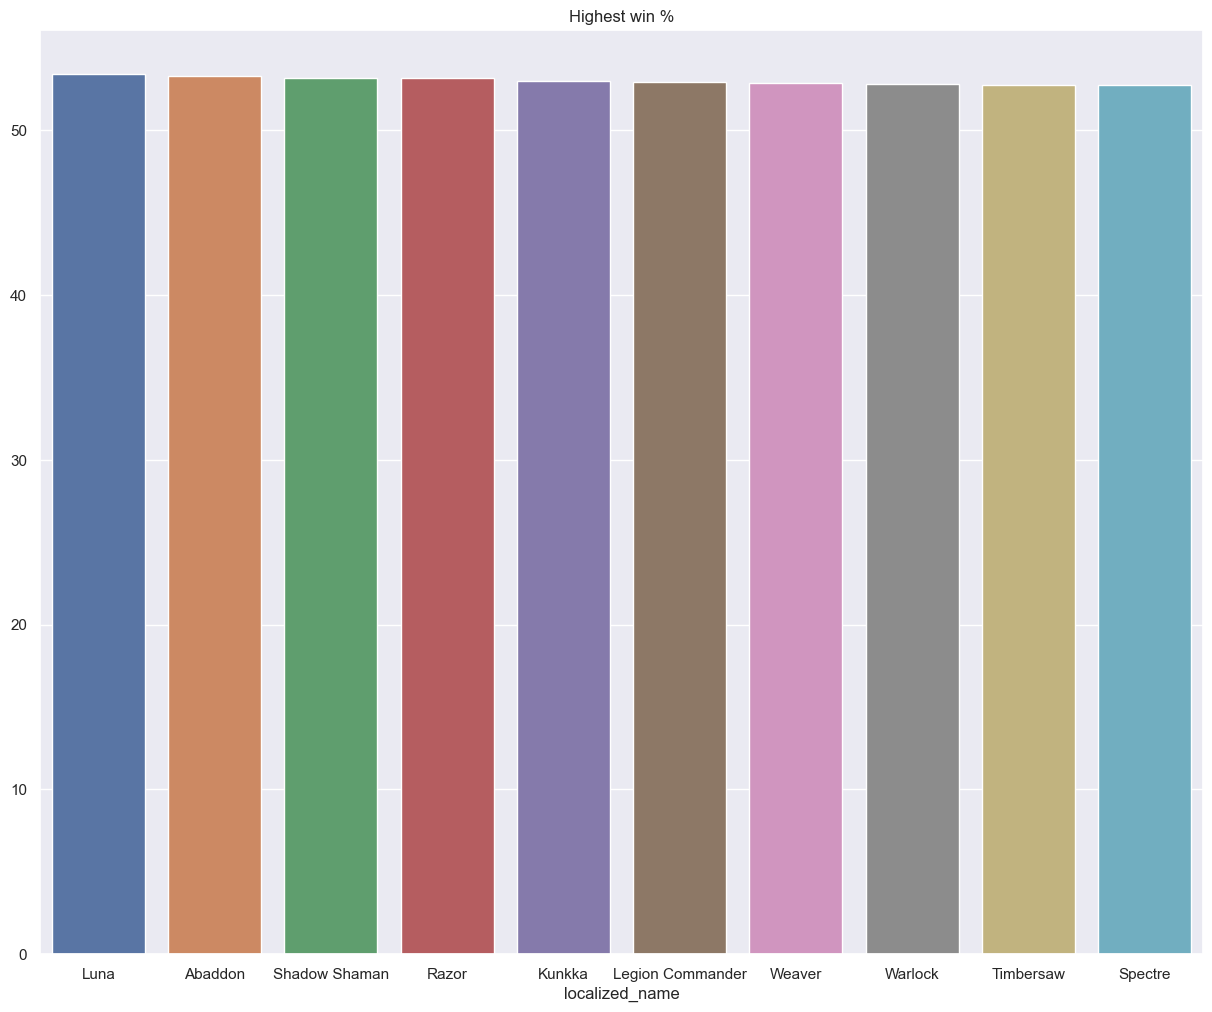

In [283]:
sns.barplot(x=win_percentage.index[0:10],y=win_percentage[:10]).set(title="Highest win %")

In [284]:
raw_wins=pd.merge(matches_played,wins,left_on=matches_played.index,right_on=wins.index)
raw_wins.rename(columns={"key_0":"hero","match_id":"matches"},inplace=True)

In [285]:
raw_wins=pd.merge(raw_wins,pd.DataFrame(win_percentage),left_on="hero",right_on=win_percentage.index,how="left")
raw_wins.columns=["hero","matches","radiant_win","win %"]
raw_wins

,hero,matches,radiant_win,win %
0,Abaddon,3310,1764,53.29
1,Alchemist,9823,5087,51.79
2,Ancient Apparition,6753,3529,52.26
3,Anti-Mage,9396,4899,52.14
4,Axe,4601,2395,52.05
...,...,...,...,...
105,Windranger,20881,10867,52.04
106,Winter Wyvern,7697,3981,51.72
107,Witch Doctor,7321,3807,52.00
108,Wraith King,7794,4036,51.78


In [286]:
raw_wins=raw_wins.sort_values(by=["win %"],ascending=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_31980\443693297.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sns.barplot(x=raw_wins["hero"][:10],y=raw_wins["radiant_win"][:10]).set(title="highest win % wins")


[Text(0.5, 1.0, 'highest win % wins')]

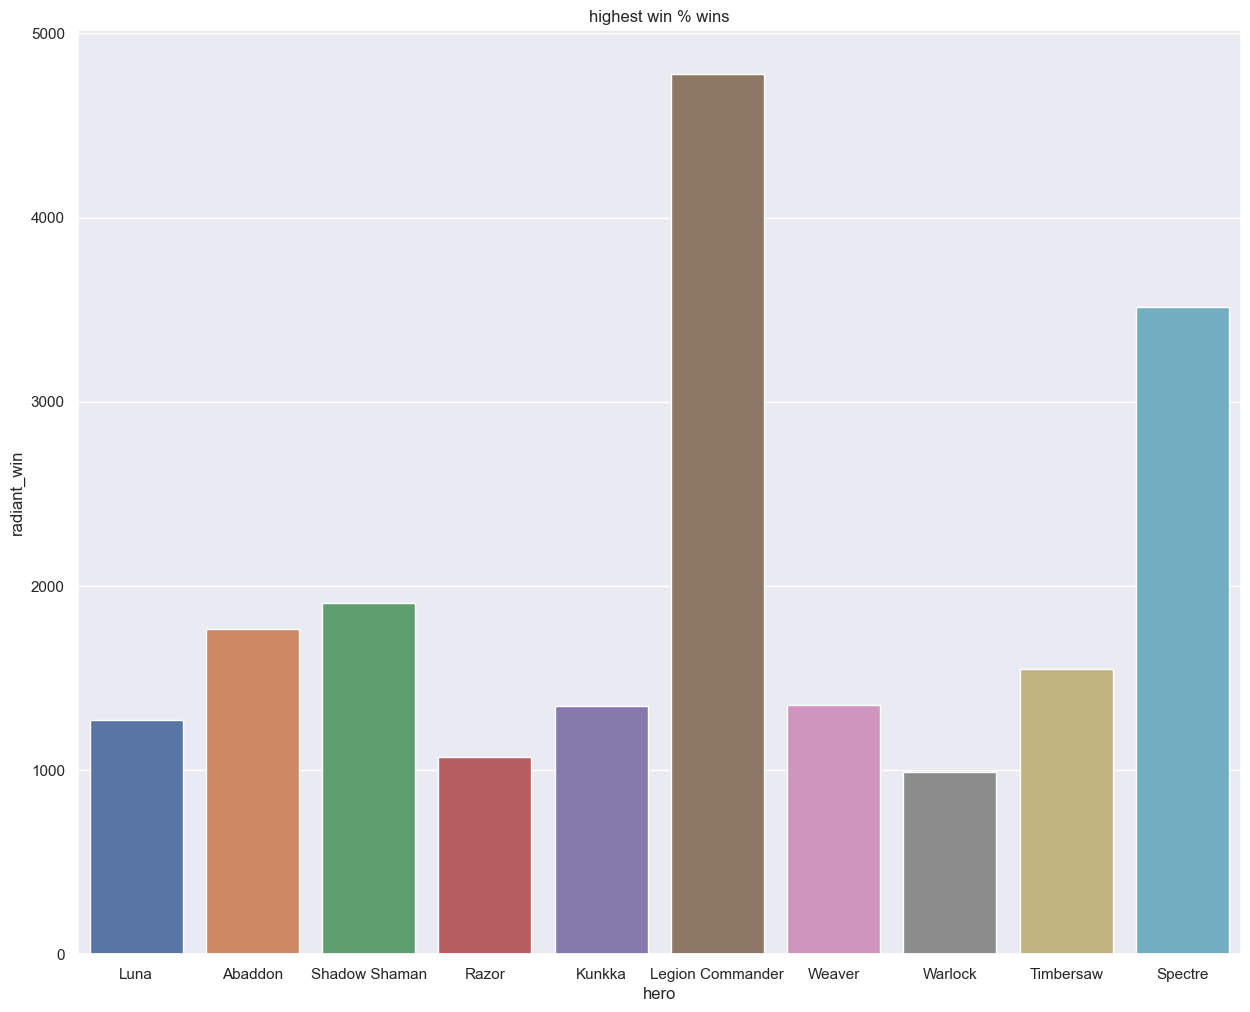

In [287]:
sns.barplot(x=raw_wins["hero"][:10],y=raw_wins["radiant_win"][:10]).set(title="highest win % wins")

C:\Users\HP\AppData\Local\Temp\ipykernel_31980\3726351174.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sns.barplot(x=raw_wins["hero"][:10],y=raw_wins["matches"][:10]).set(title="Highest win % matches")


[Text(0.5, 1.0, 'Highest win % matches')]

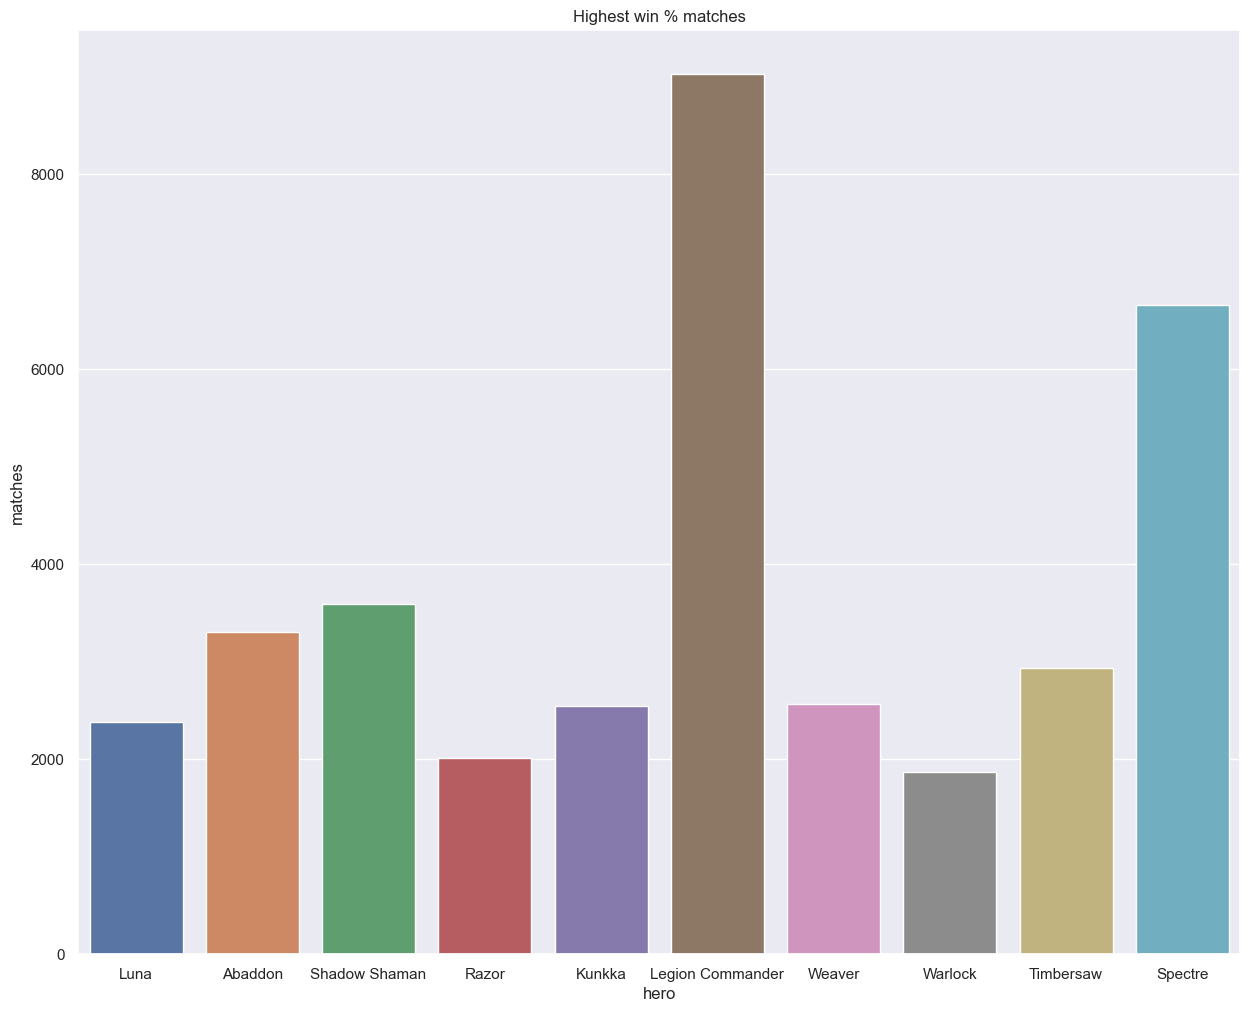

In [288]:
sns.barplot(x=raw_wins["hero"][:10],y=raw_wins["matches"][:10]).set(title="Highest win % matches")

## What hero was worst at each patch?(Time Series)

In [289]:
raw_wins=raw_wins.sort_values(by=["win %"],ascending=True)
raw_wins

,hero,matches,radiant_win,win %
47,Lone Druid,967,465,48.09
34,Huskar,3782,1877,49.63
28,Elder Titan,838,416,49.64
39,Keeper of the Light,2167,1077,49.70
52,Meepo,1670,831,49.76
...,...,...,...,...
40,Kunkka,2543,1348,53.01
71,Razor,2017,1072,53.15
77,Shadow Shaman,3589,1909,53.19
0,Abaddon,3310,1764,53.29


C:\Users\HP\AppData\Local\Temp\ipykernel_31980\4271291015.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sns.barplot(x=raw_wins["hero"][:10],y=raw_wins["win %"][:10]).set(title="Lowest win %")


[Text(0.5, 1.0, 'Lowest win %')]

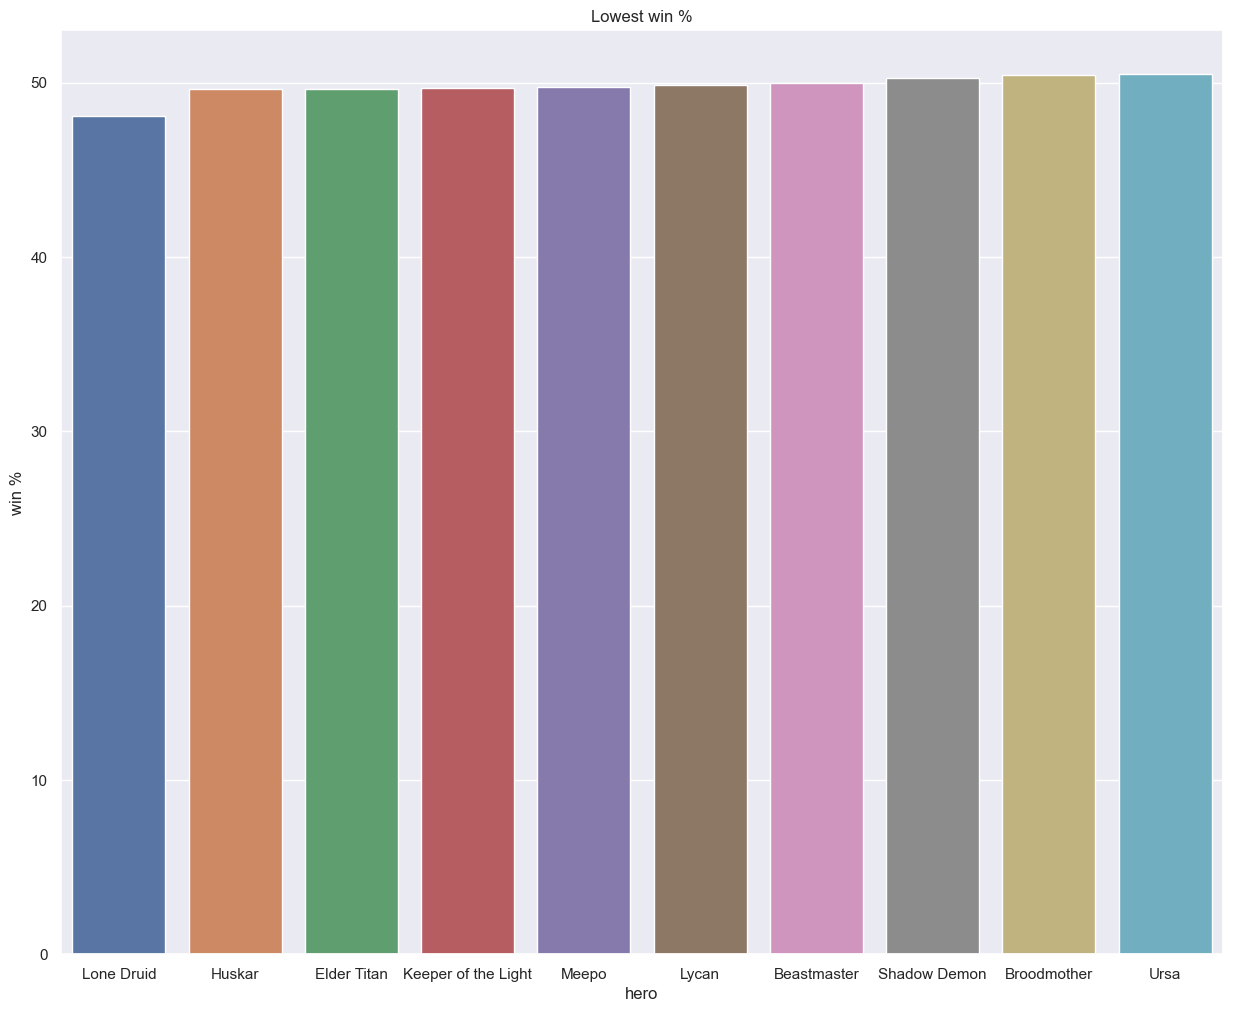

In [290]:
sns.barplot(x=raw_wins["hero"][:10],y=raw_wins["win %"][:10]).set(title="Lowest win %")

C:\Users\HP\AppData\Local\Temp\ipykernel_31980\1463623852.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sns.barplot(x=raw_wins["hero"][:10],y=raw_wins["radiant_win"][:10]).set(title="Lowest % wins")


[Text(0.5, 1.0, 'Lowest % wins')]

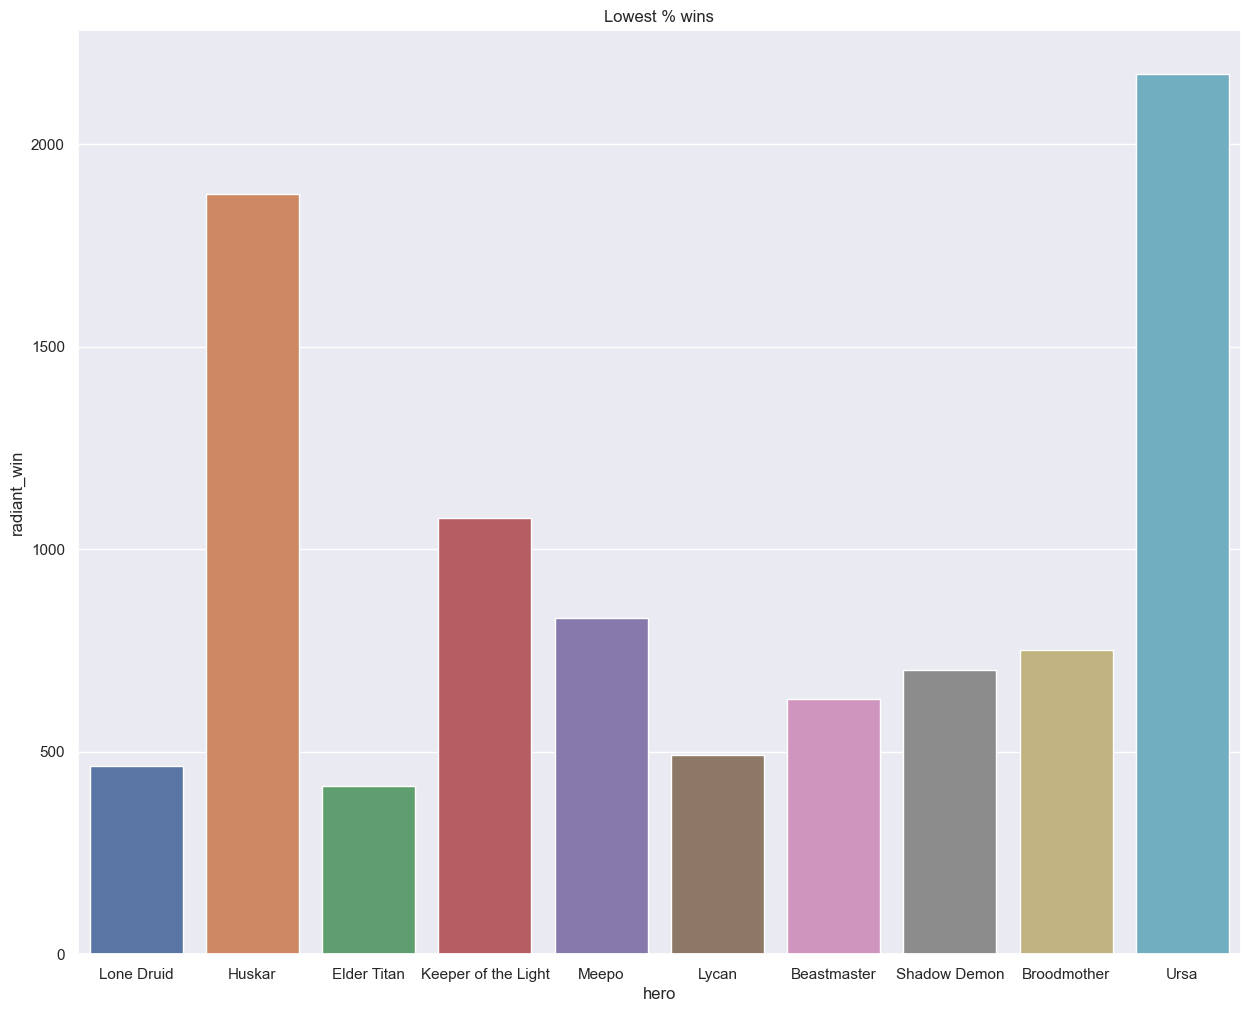

In [291]:
sns.barplot(x=raw_wins["hero"][:10],y=raw_wins["radiant_win"][:10]).set(title="Lowest % wins")

C:\Users\HP\AppData\Local\Temp\ipykernel_31980\1046342664.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sns.barplot(x=raw_wins["hero"][:10],y=raw_wins["matches"][:10]).set(title="Lowest win % matches")


[Text(0.5, 1.0, 'Lowest win % matches')]

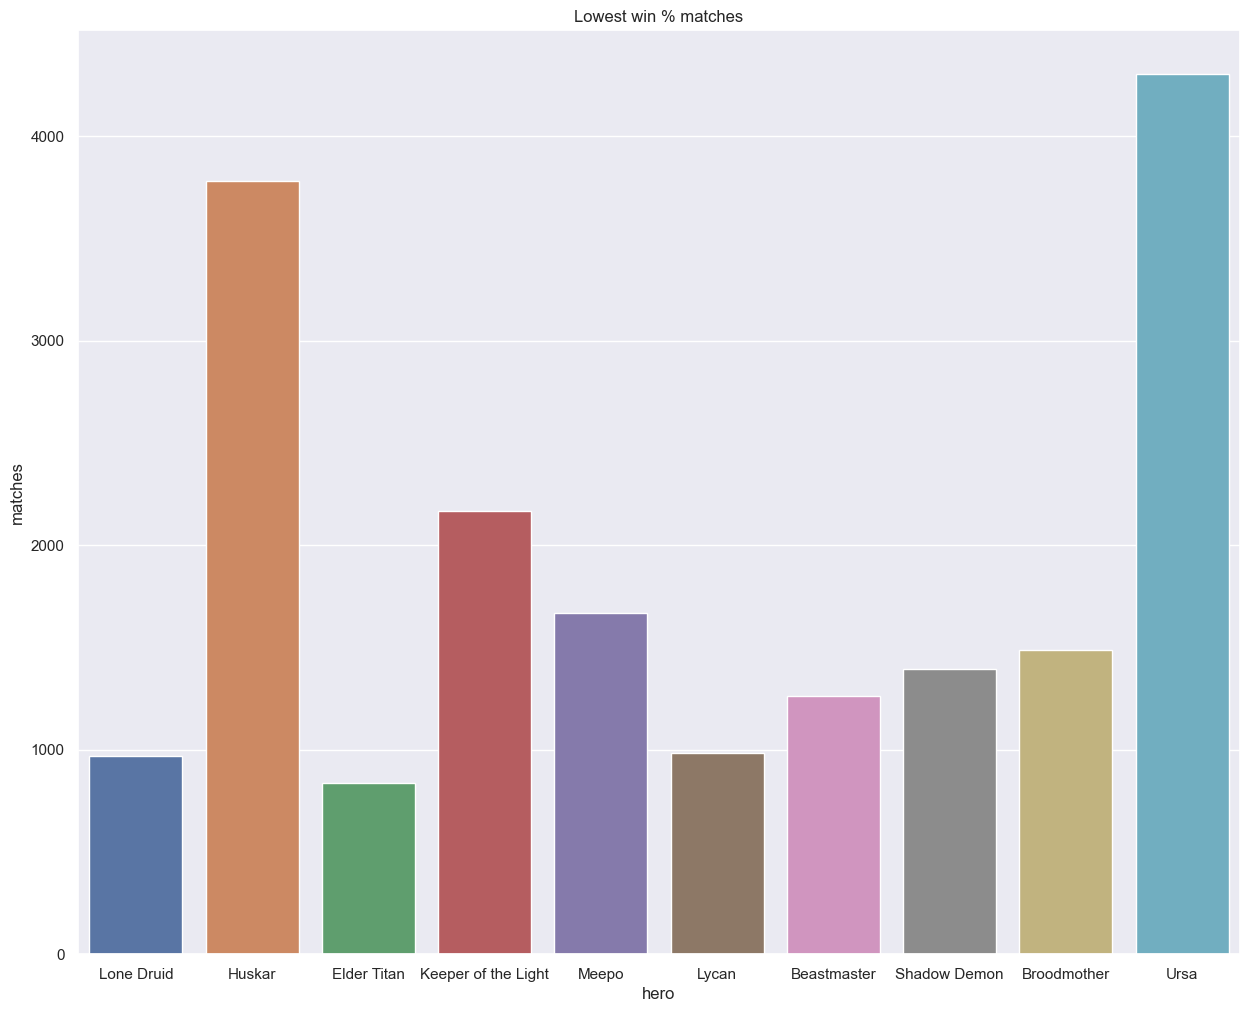

In [292]:
sns.barplot(x=raw_wins["hero"][:10],y=raw_wins["matches"][:10]).set(title="Lowest win % matches")

## Which item is bought the most?

In [314]:
df=pd.merge(players,items[["item_id","item_name"]],left_on="item_0",right_on="item_id",how="left",suffixes=("_0","_1"))
df.head()

,match_id,account_id,hero_id,player_slot,gold_per_min,xp_per_min,kills,deaths,tower_damage,item_0,item_1,item_2,item_3,item_4,item_5,item_id,item_name
0,0,0,86,0,347,362,9,3,143,180,37,73,56,108,0,180.0,arcane_boots
1,0,1,51,1,494,659,13,3,423,46,63,119,102,24,108,46.0,tpscroll
2,0,0,83,2,350,385,0,4,399,48,60,59,108,65,0,48.0,travel_boots
3,0,2,11,3,599,605,8,4,6055,63,147,154,164,79,160,63.0,power_treads
4,0,3,67,4,613,762,20,3,1833,114,92,147,0,137,63,114.0,heart


In [315]:
df=pd.merge(df,items[["item_id","item_name"]],left_on="item_1",right_on="item_id",how="left",suffixes=("_0","_1"))
df.head()

,match_id,account_id,hero_id,player_slot,gold_per_min,xp_per_min,kills,deaths,tower_damage,item_0,item_1,item_2,item_3,item_4,item_5,item_id_0,item_name_0,item_id_1,item_name_1
0,0,0,86,0,347,362,9,3,143,180,37,73,56,108,0,180.0,arcane_boots,37.0,ghost
1,0,1,51,1,494,659,13,3,423,46,63,119,102,24,108,46.0,tpscroll,63.0,power_treads
2,0,0,83,2,350,385,0,4,399,48,60,59,108,65,0,48.0,travel_boots,60.0,point_booster
3,0,2,11,3,599,605,8,4,6055,63,147,154,164,79,160,63.0,power_treads,147.0,manta
4,0,3,67,4,613,762,20,3,1833,114,92,147,0,137,63,114.0,heart,92.0,urn_of_shadows


In [316]:
df=pd.merge(df,items[["item_id","item_name"]],left_on="item_2",right_on="item_id",how="left")
df.head()

,match_id,account_id,hero_id,player_slot,gold_per_min,xp_per_min,kills,deaths,tower_damage,item_0,...,item_2,item_3,item_4,item_5,item_id_0,item_name_0,item_id_1,item_name_1,item_id,item_name
0,0,0,86,0,347,362,9,3,143,180,...,73,56,108,0,180.0,arcane_boots,37.0,ghost,73.0,bracer
1,0,1,51,1,494,659,13,3,423,46,...,119,102,24,108,46.0,tpscroll,63.0,power_treads,119.0,shivas_guard
2,0,0,83,2,350,385,0,4,399,48,...,59,108,65,0,48.0,travel_boots,60.0,point_booster,59.0,energy_booster
3,0,2,11,3,599,605,8,4,6055,63,...,154,164,79,160,63.0,power_treads,147.0,manta,154.0,sange_and_yasha
4,0,3,67,4,613,762,20,3,1833,114,...,147,0,137,63,114.0,heart,92.0,urn_of_shadows,147.0,manta


In [317]:
df=pd.merge(df,items[["item_id","item_name"]],left_on="item_3",right_on="item_id",how="left",suffixes=("_2","_3"))
df.head()

,match_id,account_id,hero_id,player_slot,gold_per_min,xp_per_min,kills,deaths,tower_damage,item_0,...,item_4,item_5,item_id_0,item_name_0,item_id_1,item_name_1,item_id_2,item_name_2,item_id_3,item_name_3
0,0,0,86,0,347,362,9,3,143,180,...,108,0,180.0,arcane_boots,37.0,ghost,73.0,bracer,56.0,ring_of_health
1,0,1,51,1,494,659,13,3,423,46,...,24,108,46.0,tpscroll,63.0,power_treads,119.0,shivas_guard,102.0,force_staff
2,0,0,83,2,350,385,0,4,399,48,...,65,0,48.0,travel_boots,60.0,point_booster,59.0,energy_booster,108.0,ultimate_scepter
3,0,2,11,3,599,605,8,4,6055,63,...,79,160,63.0,power_treads,147.0,manta,154.0,sange_and_yasha,164.0,helm_of_the_dominator
4,0,3,67,4,613,762,20,3,1833,114,...,137,63,114.0,heart,92.0,urn_of_shadows,147.0,manta,NaN,NaN


In [318]:
df=pd.merge(df,items[["item_id","item_name"]],left_on="item_4",right_on="item_id",how="left")
df.head()

,match_id,account_id,hero_id,player_slot,gold_per_min,xp_per_min,kills,deaths,tower_damage,item_0,...,item_id_0,item_name_0,item_id_1,item_name_1,item_id_2,item_name_2,item_id_3,item_name_3,item_id,item_name
0,0,0,86,0,347,362,9,3,143,180,...,180.0,arcane_boots,37.0,ghost,73.0,bracer,56.0,ring_of_health,108.0,ultimate_scepter
1,0,1,51,1,494,659,13,3,423,46,...,46.0,tpscroll,63.0,power_treads,119.0,shivas_guard,102.0,force_staff,24.0,ultimate_orb
2,0,0,83,2,350,385,0,4,399,48,...,48.0,travel_boots,60.0,point_booster,59.0,energy_booster,108.0,ultimate_scepter,65.0,hand_of_midas
3,0,2,11,3,599,605,8,4,6055,63,...,63.0,power_treads,147.0,manta,154.0,sange_and_yasha,164.0,helm_of_the_dominator,79.0,mekansm
4,0,3,67,4,613,762,20,3,1833,114,...,114.0,heart,92.0,urn_of_shadows,147.0,manta,NaN,NaN,137.0,radiance


In [319]:
df=pd.merge(df,items[["item_id","item_name"]],left_on="item_4",right_on="item_id",how="left",suffixes=("_4","_5"))
df.head()

,match_id,account_id,hero_id,player_slot,gold_per_min,xp_per_min,kills,deaths,tower_damage,item_0,...,item_id_1,item_name_1,item_id_2,item_name_2,item_id_3,item_name_3,item_id_4,item_name_4,item_id_5,item_name_5
0,0,0,86,0,347,362,9,3,143,180,...,37.0,ghost,73.0,bracer,56.0,ring_of_health,108.0,ultimate_scepter,108.0,ultimate_scepter
1,0,1,51,1,494,659,13,3,423,46,...,63.0,power_treads,119.0,shivas_guard,102.0,force_staff,24.0,ultimate_orb,24.0,ultimate_orb
2,0,0,83,2,350,385,0,4,399,48,...,60.0,point_booster,59.0,energy_booster,108.0,ultimate_scepter,65.0,hand_of_midas,65.0,hand_of_midas
3,0,2,11,3,599,605,8,4,6055,63,...,147.0,manta,154.0,sange_and_yasha,164.0,helm_of_the_dominator,79.0,mekansm,79.0,mekansm
4,0,3,67,4,613,762,20,3,1833,114,...,92.0,urn_of_shadows,147.0,manta,NaN,NaN,137.0,radiance,137.0,radiance


In [323]:
itemlist=items["item_name"].to_list()
output = {}
for word in itemlist:
    output[word] = df['item_name_0'].str.contains(word).sum()
    output[word] += df['item_name_1'].str.contains(word).sum()
    output[word] += df['item_name_2'].str.contains(word).sum()
    output[word] += df['item_name_3'].str.contains(word).sum()
    output[word] += df['item_name_4'].str.contains(word).sum()
    output[word] += df['item_name_5'].str.contains(word).sum()

In [324]:
output

{'blink': 139256,
 'blades_of_attack': 789,
 'broadsword': 1516,
 'chainmail': 3211,
 'claymore': 1084,
 'helm_of_iron_will': 636,
 'javelin': 4376,
 'mithril_hammer': 7774,
 'platemail': 7981,
 'quarterstaff': 965,
 'quelling_blade': 15130,
 'ring_of_protection': 1143,
 'gauntlets': 1856,
 'slippers': 561,
 'mantle': 730,
 'branches': 13081,
 'belt_of_strength': 1899,
 'boots_of_elves': 731,
 'robe': 1317,
 'circlet': 895,
 'ogre_axe': 20972,
 'blade_of_alacrity': 3173,
 'staff_of_wizardry': 11693,
 'ultimate_orb': 8660,
 'gloves': 1552,
 'lifesteal': 3597,
 'ring_of_regen': 2397,
 'sobi_mask': 2213,
 'boots': 323489,
 'gem': 15033,
 'cloak': 3993,
 'talisman_of_evasion': 2080,
 'cheese': 1456,
 'magic_stick': 12852,
 'magic_wand': 119962,
 'ghost': 17868,
 'clarity': 1617,
 'flask': 1164,
 'dust': 26861,
 'bottle': 65582,
 'ward_observer': 20517,
 'ward_sentry': 12997,
 'tango': 4346,
 'courier': 252,
 'tpscroll': 179610,
 'travel_boots': 70124,
 'phase_boots': 86761,
 'demon_edge': 

In [328]:
output = dict(sorted(output.items(), key=lambda item: item[1], reverse=True))
output

{'boots': 323489,
 'tpscroll': 179610,
 'power_treads': 161178,
 'blink': 139256,
 'ultimate_scepter': 125428,
 'magic_wand': 119962,
 'phase_boots': 86761,
 'arcane_boots': 85290,
 'black_king_bar': 80951,
 'travel_boots': 70124,
 'bottle': 65582,
 'tranquil_boots': 54396,
 'force_staff': 53392,
 'yasha': 49861,
 'sange': 41813,
 'sange_and_yasha': 37785,
 'ring_of_aquila': 35308,
 'urn_of_shadows': 34823,
 'desolator': 34352,
 'blade_mail': 34213,
 'manta': 34026,
 'invis_sword': 33649,
 'cyclone': 32093,
 'monkey_king_bar': 30226,
 'bfury': 28911,
 'glimmer_cape': 27930,
 'vladmir': 26952,
 'ancient_janggo': 26895,
 'dust': 26861,
 'mekansm': 26497,
 'helm_of_the_dominator': 26358,
 'assault': 25184,
 'soul_ring': 24925,
 'hand_of_midas': 23584,
 'greater_crit': 22961,
 'ogre_axe': 20972,
 'guardian_greaves': 20658,
 'ward_observer': 20517,
 'null_talisman': 19152,
 'basher': 18643,
 'skadi': 18532,
 'heart': 18135,
 'radiance': 18133,
 'orchid': 18128,
 'stout_shield': 17882,
 'gho

[Text(0.5, 1.0, 'Most bought items')]

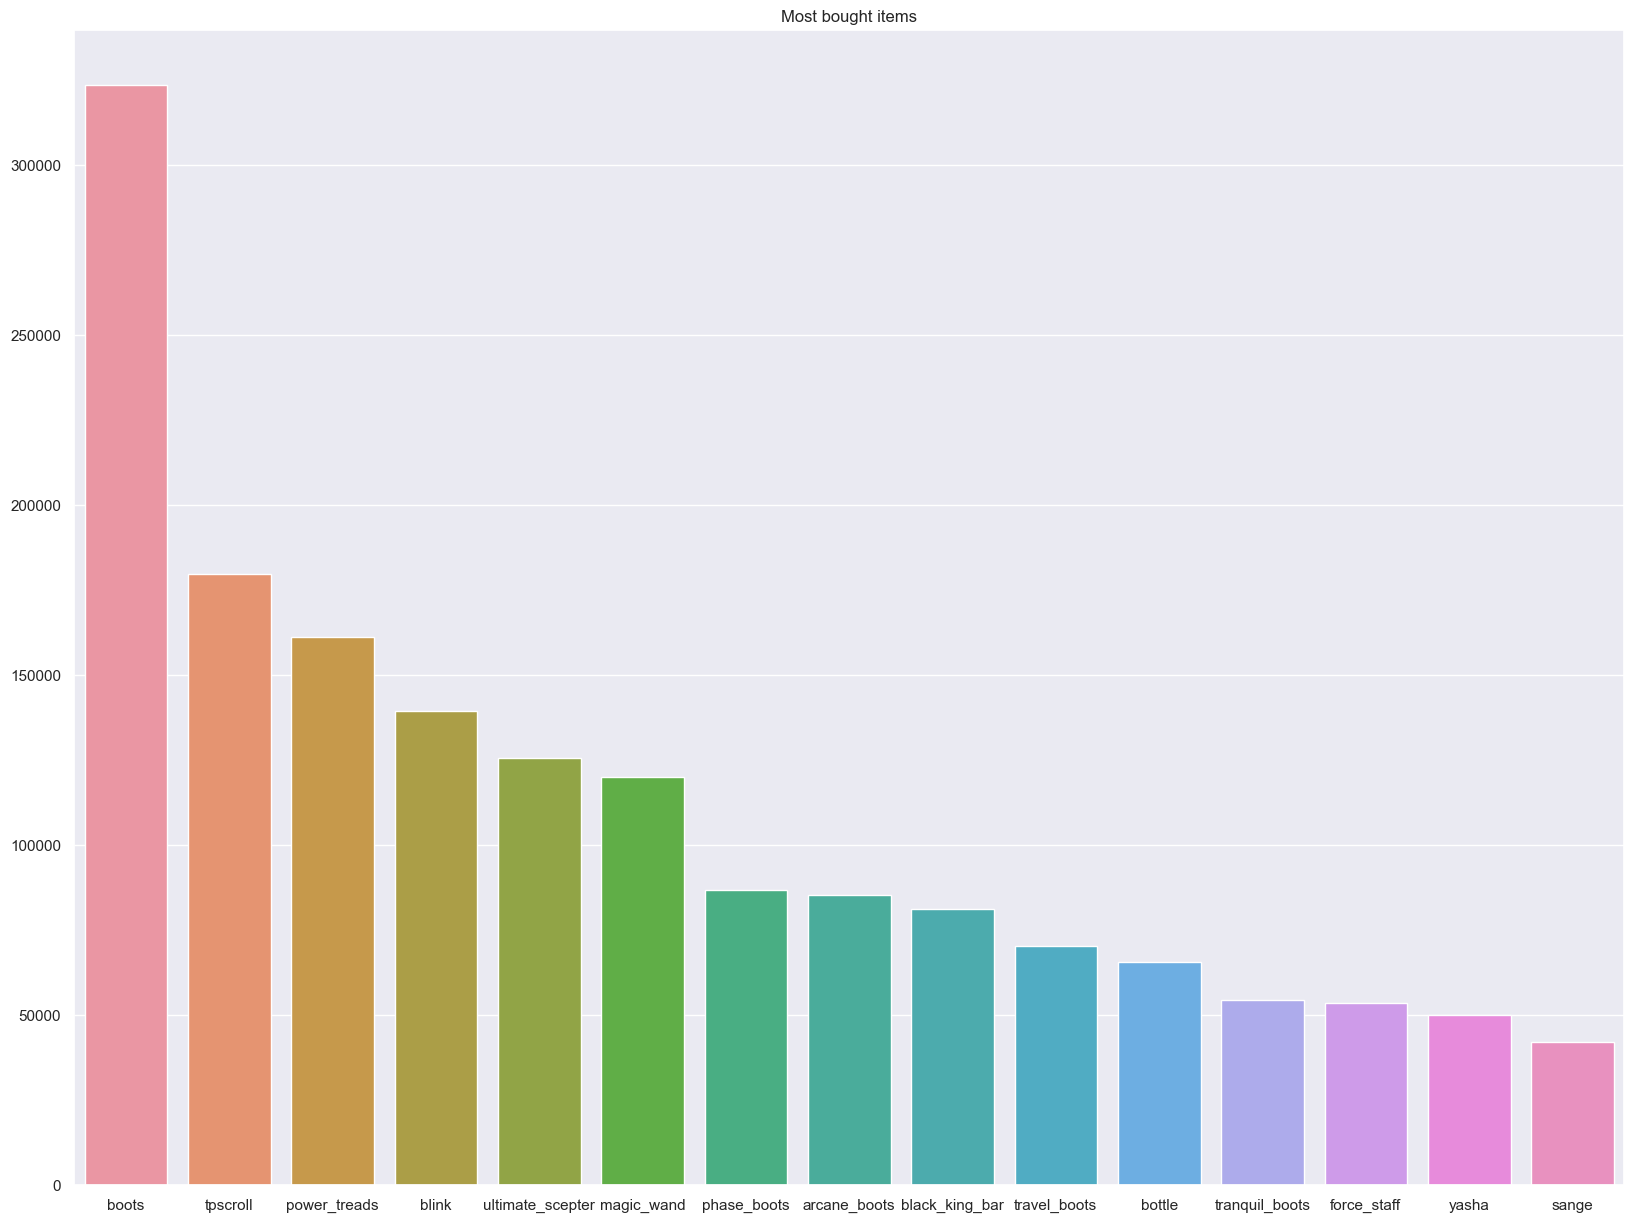

In [384]:
sns.set(font_scale=10)
sns.set_theme(rc={'figure.figsize':(20,15)})
sns.barplot(x=list(output.keys())[:15],y=list(output.values())[:15]).set(title="Most bought items")

## What is the least bought item?

In [389]:
output = dict(sorted(output.items(), key=lambda item: item[1]))
output = {k:v for k,v in output.items() if v>0}
output

{'flying_courier': 38,
 'courier': 252,
 'tango_single': 295,
 'slippers': 561,
 'necronomicon_2': 580,
 'helm_of_iron_will': 636,
 'mantle': 730,
 'boots_of_elves': 731,
 'blades_of_attack': 789,
 'circlet': 895,
 'energy_booster': 948,
 'quarterstaff': 965,
 'claymore': 1084,
 'ring_of_protection': 1143,
 'flask': 1164,
 'relic': 1166,
 'robe': 1317,
 'dagon_4': 1338,
 'oblivion_staff': 1343,
 'dagon_3': 1441,
 'dagon_2': 1447,
 'cheese': 1456,
 'broadsword': 1516,
 'gloves': 1552,
 'clarity': 1617,
 'buckler': 1841,
 'gauntlets': 1856,
 'ring_of_health': 1863,
 'belt_of_strength': 1899,
 'talisman_of_evasion': 2080,
 'shadow_amulet': 2107,
 'sobi_mask': 2213,
 'ring_of_regen': 2397,
 'eagle': 2457,
 'vitality_booster': 3138,
 'blade_of_alacrity': 3173,
 'chainmail': 3211,
 'hood_of_defiance': 3256,
 'ethereal_blade': 3435,
 'void_stone': 3513,
 'lifesteal': 3597,
 'headdress': 3623,
 'enchanted_mango': 3751,
 'rapier': 3820,
 'soul_booster': 3876,
 'cloak': 3993,
 'reaver': 4017,
 '

[Text(0.5, 1.0, 'Least bought items')]

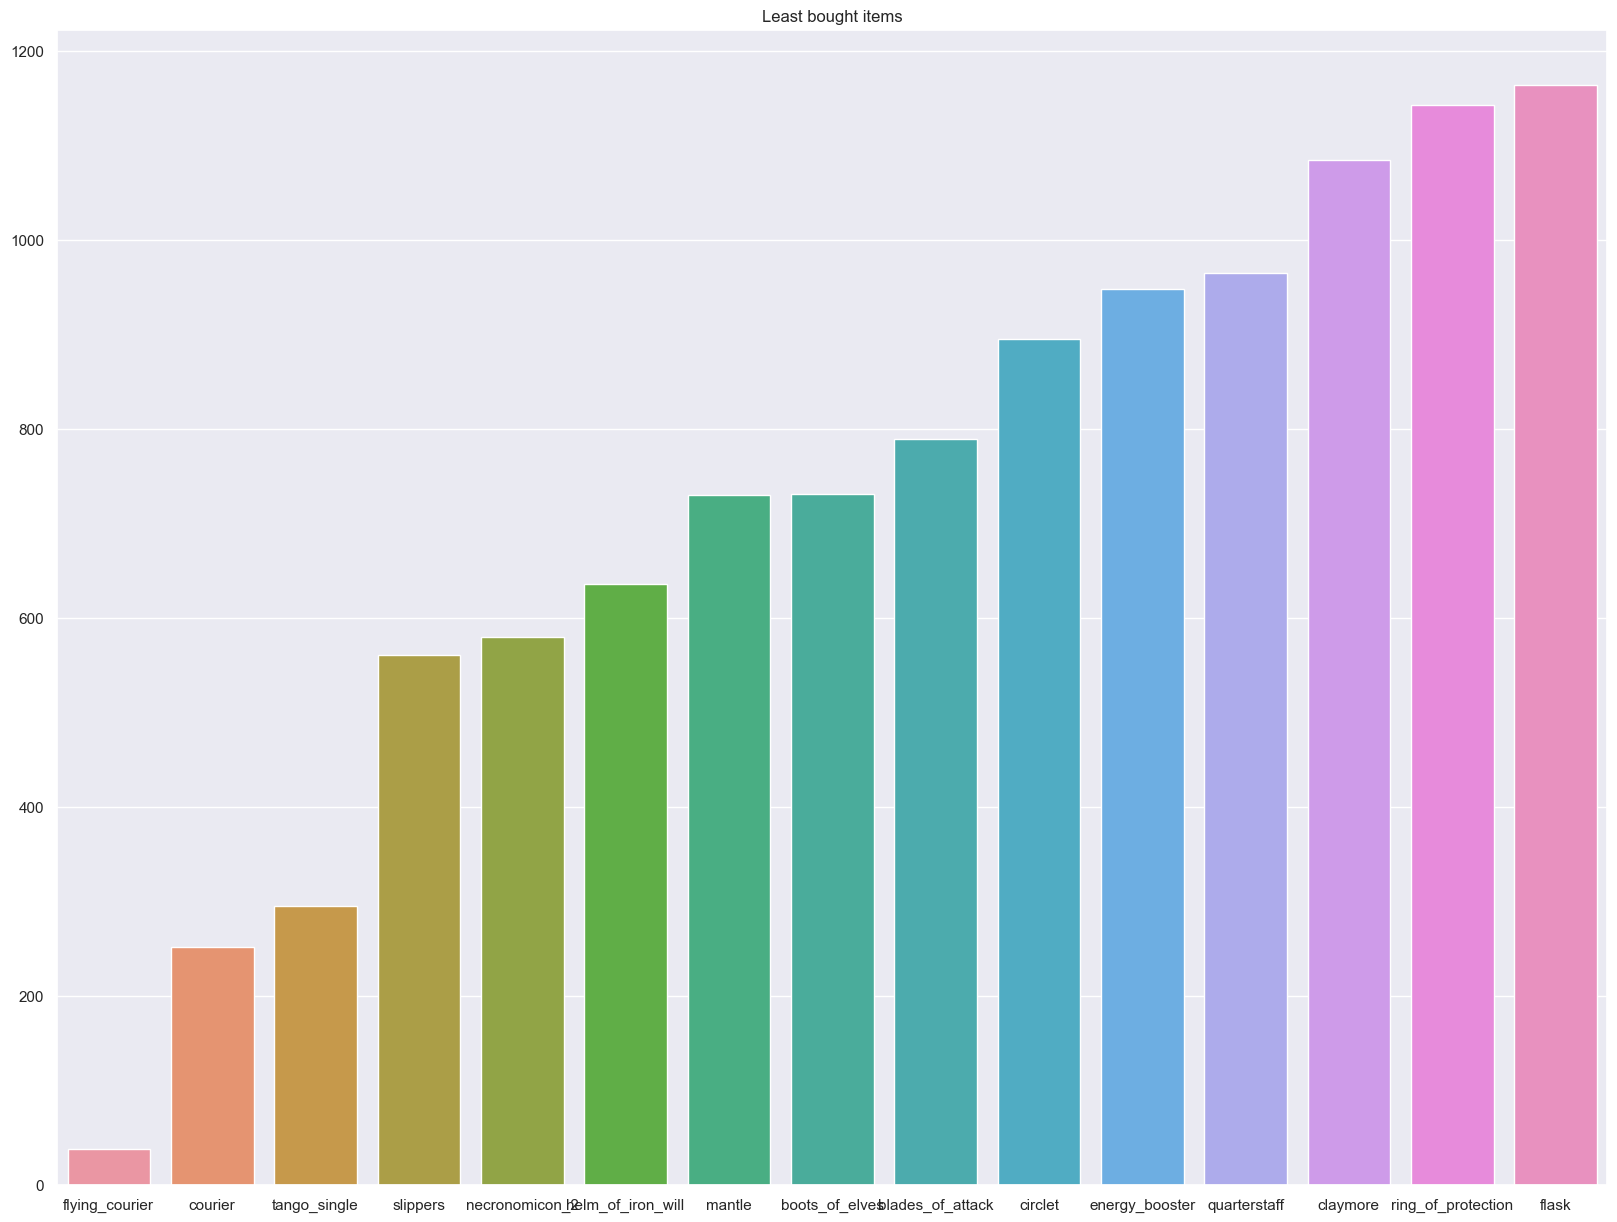

In [391]:
sns.set(font_scale=10)
sns.set_theme(rc={'figure.figsize':(20,15)})
sns.barplot(x=list(output.keys())[:15],y=list(output.values())[:15]).set(title="Least bought items")

## What is the disrtibution of GPM for all matches?

[Text(0.5, 1.0, 'Distribution of gold per minute')]

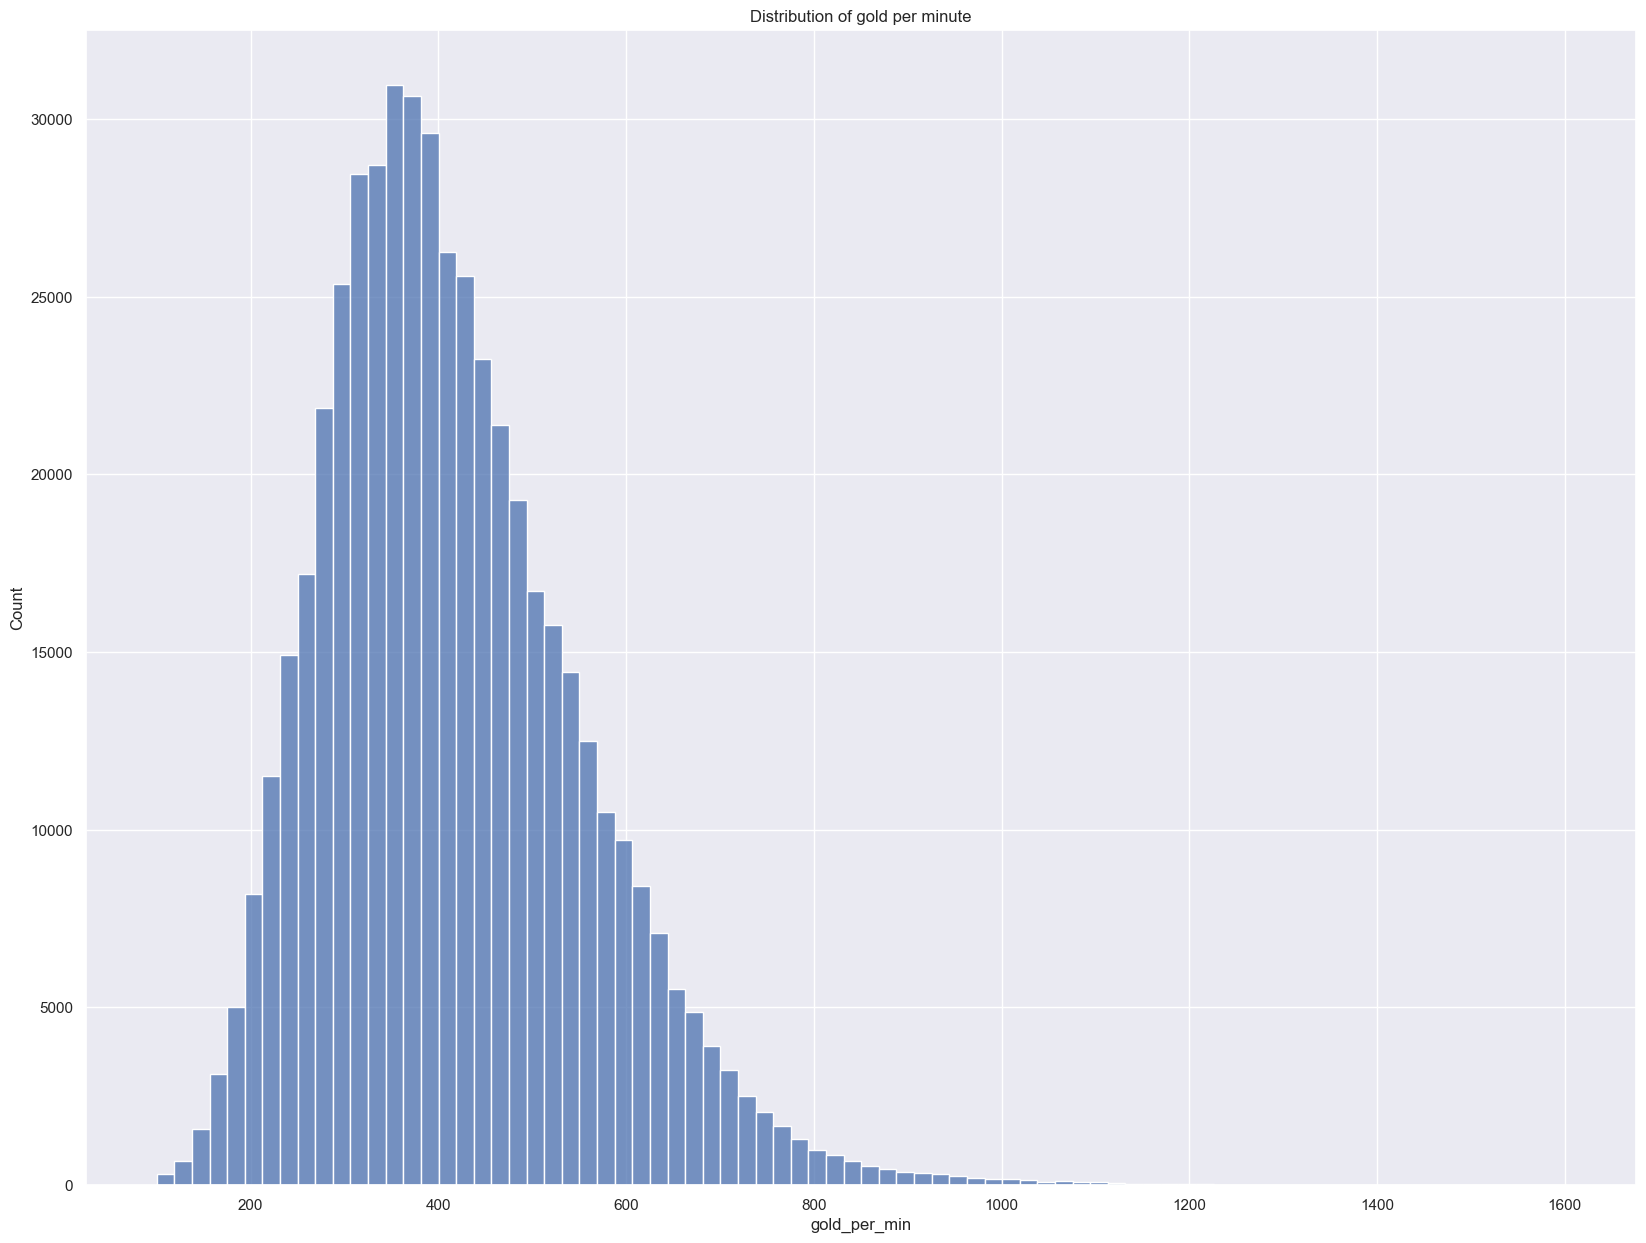

In [401]:
sns.histplot(players["gold_per_min"],bins=80).set(title="Distribution of gold per minute")

## What is the distribution of XPM for all matches?

[Text(0.5, 1.0, 'Distribution of XP per minute')]

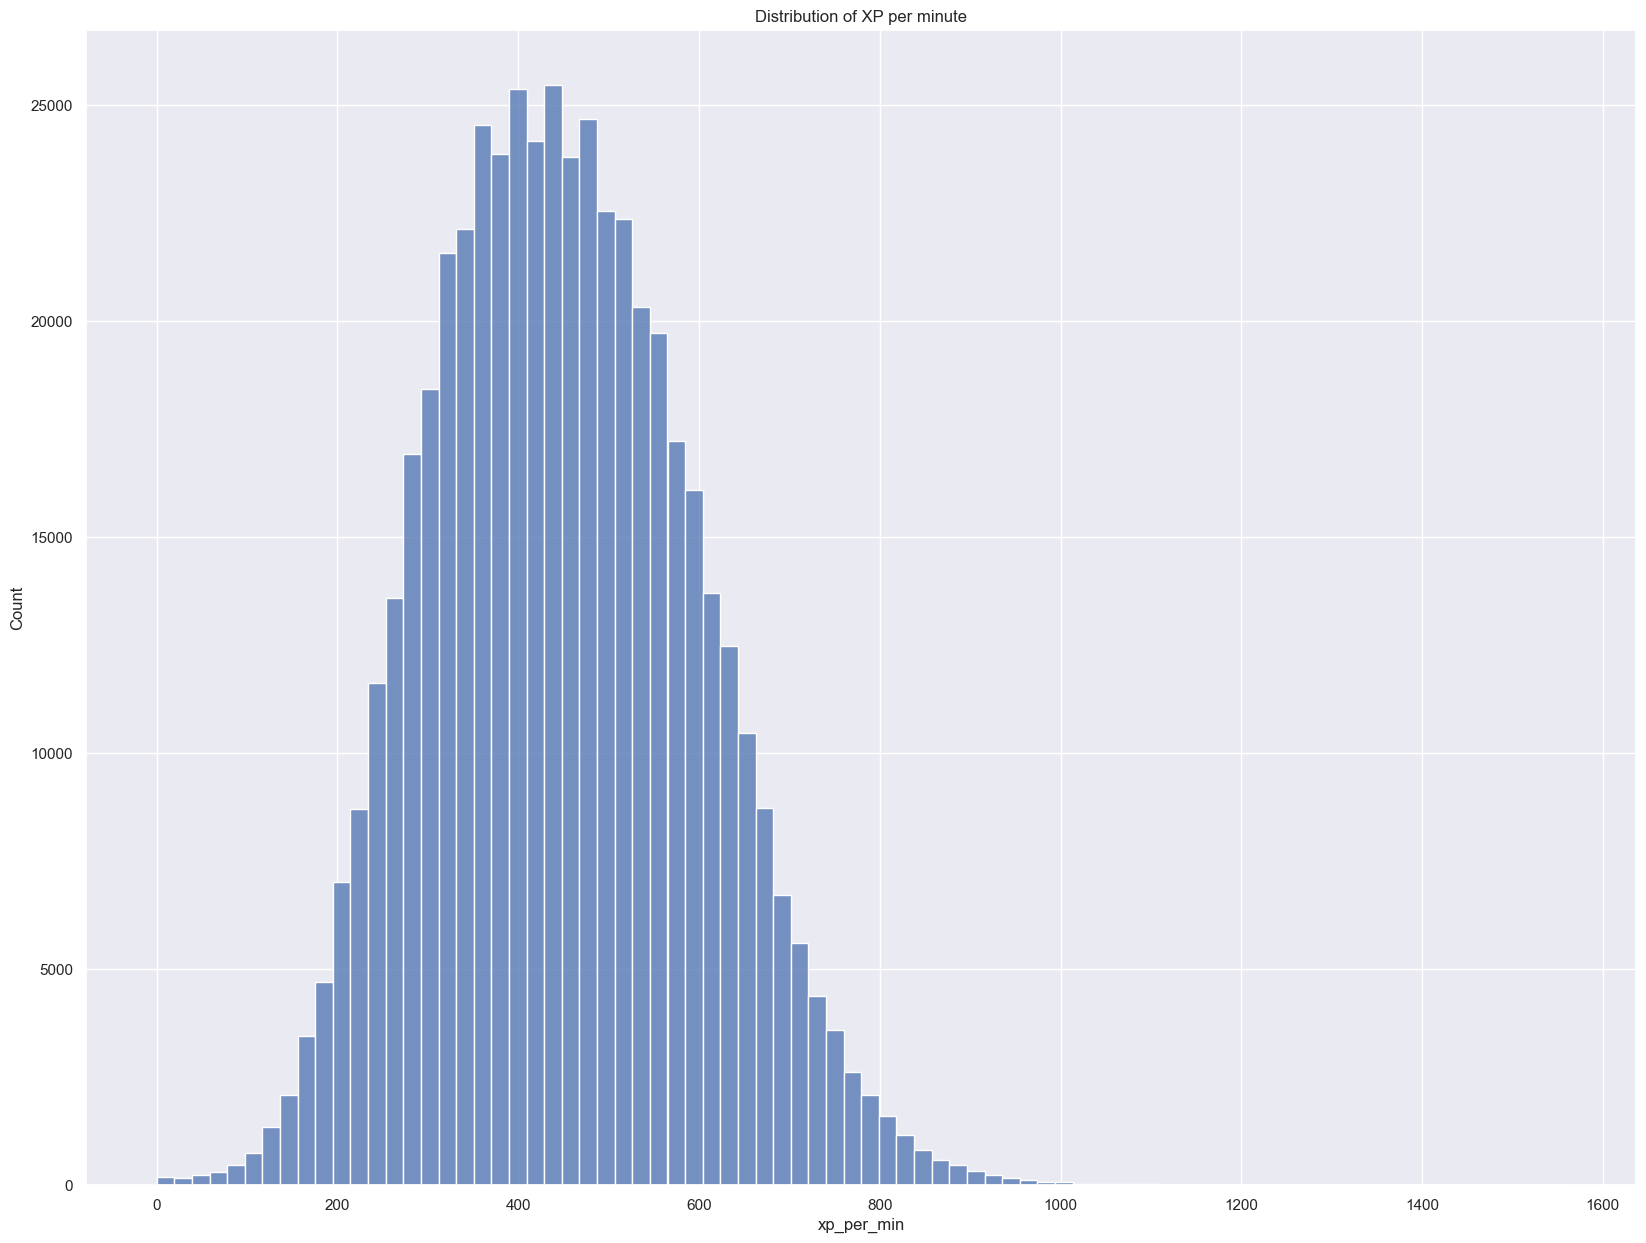

In [402]:
sns.histplot(players["xp_per_min"],bins=80).set(title="Distribution of XP per minute")